# CSAT: E-Commerce Customer Satisfaction Score Prediction - Deep Learning (ANNs)
<h3 align="center">(by Aiman Sahay)</h3>


---
### **Project Type**    - Classification - Deep Learning - ANN
### **Contribution**    - Individual - Aiman Sahay


---

## **PROJECT SUMMARY**

Customer satisfaction plays a critical role in the success of e-commerce businesses, directly influencing customer retention, brand perception, and long-term revenue. Traditionally, CSAT has been measured through post-interaction surveys, which are often delayed, subjective, and incomplete. With the growing availability of operational and behavioral data, deep learning offers an opportunity to predict CSAT scores proactively, enabling organizations to improve service quality in near real time.

This project focuses on building a **multi-class CSAT prediction system** using customer service interaction data from the e-commerce domain. The dataset consists of **85,907 records with 20 features**, capturing customer details, product information, agent attributes, response times, and operational variables. The target variable is a **five-level CSAT score (1–5)** representing varying degrees of customer dissatisfaction to high satisfaction.

Exploratory Data Analysis (EDA) revealed several meaningful insights. **Response time** emerged as a strong driver of customer satisfaction, with faster responses consistently associated with higher CSAT scores. **Product category** and **item price** also influenced satisfaction, suggesting that customer expectations vary across products and price ranges. Additionally, **agent experience** and **shift timing** showed noticeable effects on CSAT, highlighting the operational nature of customer satisfaction beyond product-related factors.

Data preprocessing involved handling missing values, encoding high-cardinality categorical variables, and addressing **class imbalance using SMOTE**. These steps were essential to ensure robust learning and prevent bias toward majority classes. The dataset was split into training and validation sets using stratified sampling to preserve class distributions.

An **Artificial Neural Network (ANN)** was developed as the primary modeling approach. The final architecture incorporated batch normalization, dropout for regularization, and class weights to further mitigate imbalance. Model performance was evaluated using **Stratified K-Fold Cross-Validation**, along with accuracy, precision, recall, F1-score, confusion matrices, and ROC–AUC curves.

The model achieved an overall **accuracy** in the range of **64–69%**, with **strong ROC–AUC scores across all CSAT classes**, indicating good ranking and discrimination ability. Performance was strongest for extreme satisfaction levels, where customer sentiment is clearer, while mid-range CSAT classes showed more overlap and misclassification, an expected outcome given the subjective and ordinal nature of satisfaction scores. Most errors occurred between adjacent CSAT levels rather than extreme mismatches.

This project demonstrates the practical value of deep learning in predicting customer satisfaction at scale. While there is room for improvement such as treating CSAT as an ordinal problem or exploring tree-based models like CatBoost, the current solution provides actionable insights for identifying dissatisfied customers early, improving agent performance, and optimizing service operations. The project highlights how data-driven CSAT prediction can move businesses from reactive feedback analysis to **proactive customer experience management**.

---

## **GITHUB LINK**

https://github.com/AimanSahay/CSAT-E-Commerce-Customer-Satisfaction-Score-Prediction---Deep-Learning-ANNs-

---
## **PROJECT OBJECTIVE / PROBLEM STATEMENT**


The goal of this project is to **develop a Deep Learning–based Artificial Neural Network (ANN) model** that can **predict Customer Satisfaction (CSAT) scores** based on customer interaction data from the e-commerce platform Shopzilla.

Instead of relying solely on delayed survey responses, the intent is to estimate CSAT in real-time using features such as interaction details, timestamps, customer remarks, product categories, and agent-related attributes.

The model aims to forecast CSAT scores accurately and support organisations in:
- Identifying dissatisfied customers early,
- Improving service workflows, and
- Enhancing customer experience and retention.

This project therefore focuses on ***transforming CSAT measurement from a reactive process to a predictive mechanism*** by leveraging deep learning.

---
# ***Let's Begin !***

## **1. Know Your Data**

### Import Libraries

In [158]:
# Core Python Libraries
import re
import warnings
from pathlib import Path
from datetime import datetime

# Numerical & Data Handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)

# Scikit-learn: Model Selection
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold
)

# Scikit-learn: Preprocessing & Feature Engineering
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    LabelEncoder,
    label_binarize
)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer

# Scikit-learn: Metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_curve,
    auc
)

# Scikit-learn: Utilities
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight

# Statistical Analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Imbalanced Learning
from imblearn.over_sampling import SMOTE

# Deep Learning / TensorFlow & Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ReduceLROnPlateau
)

# Scikit-Keras Wrapper
from scikeras.wrappers import KerasClassifier

# Model Persistence
import joblib

### Load Dataset

In [3]:
csat_df = pd.read_csv("Folder_path/eCommerce_Customer_support_data.csv")

### Dataset First View

In [4]:
# Dataset First
csat_df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Shape

In [5]:
print(f"Dataset Shape: {csat_df.shape}")

Dataset Shape: (85907, 20)


### Dataset Information

In [6]:
csat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Checking for Duplicate Values

In [7]:
print(f" Duplicate values in the Dataset: {csat_df.duplicated().sum()}")

 Duplicate values in the Dataset: 0


#### Missing Values/Null Values

In [8]:
csat_df.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

***Missing Values Percentage***

In [9]:
# Function to calculate missing values percentage.
def missing_val_df(df):
    # Calculate the total number of missing values in each column
    missing_count = df.isnull().sum()
    
    # Calculate the percentage of missing values in each column
    missing_percent = (missing_count / len(df)) * 100
    
    # Create a DataFrame to display missing counts and percentages side by side
    missing_df = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Percentage': missing_percent.round(2)
    })
    
    # Return the missing_values df
    return missing_df

In [10]:
missing_val_df(csat_df)

,Missing Count,Missing Percentage
Unique id,0,0.00
channel_name,0,0.00
category,0,0.00
Sub-category,0,0.00
Customer Remarks,57165,66.54
Order_id,18232,21.22
order_date_time,68693,79.96
Issue_reported at,0,0.00
issue_responded,0,0.00
Survey_response_Date,0,0.00


***Visualize Missing Values***

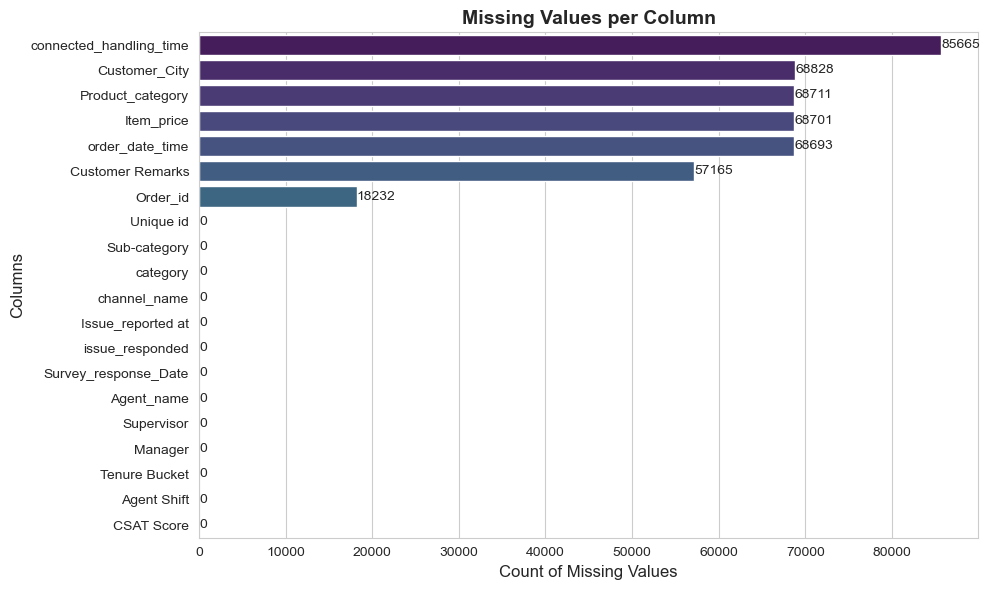

In [11]:
# Calculate missing values
missing_values = csat_df.isnull().sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # clean background
barplot = sns.barplot(
    x=missing_values.values,
    y=missing_values.index,
    palette="viridis"  # nice color gradient
)

# Add value labels on bars
for index, value in enumerate(missing_values.values):
    plt.text(value + 0.5, index, str(value), va='center')

# Labels and title
plt.xlabel("Count of Missing Values", fontsize=12)
plt.ylabel("Columns", fontsize=12)
plt.title("Missing Values per Column", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

**What did you know about your dataset?**

**Customer Satisfaction Score (CSAT)** serves as a critical **Key Performance Indicator (KPI)**, reflecting how satisfied customers are with a company’s products, services, or overall shopping experience. 

The dataset contains **85,907 rows and 20 columns**. While there are **no duplicate records**.

Some columns do include **missing values**, following are the observations:

| **Column** | **Missing %** | **Possible Interpretation / Reason** | 
|------------------|-------------|--------------------------------------|
|`Customer Remarks`|66.54%|Many customers did not leave written feedback after the interaction.|
|`Order_id`|21.22%|Some service interactions may not have been linked to a specific order.|
|`order_date_time`, `Customer_City`, `Product_category`, `Item_price`|~80%|These attributes seem to be available only for order-related cases and missing for inquiry-related interactions.|
|`connected_handling_time`|99.72%|This field appears almost entirely unavailable and may not be useful for modeling.|

---
## **2. Understanding Your Variables**

In [12]:
# Dataset Columns
csat_df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [13]:
# Dataset Describe
csat_df.describe(include='all')

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,Good,3230db30-f8da-4c44-8636-ec76d1d3d4f3,09/08/2023 11:55,13/08/2023 10:40,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


## **Dataset Description**

- **Unique id:** Unique identifier for each record (integer).
- **Channel name:** Name of the customer service channel (object/string),3 unique channel name.
- **Category:** Category of the interaction (object/string) ,12 unique category.
- **Sub-category:** Sub-category of the interaction (object/string),57 unique sub-category.
- **Customer Remarks:** Feedback provided by the customer (object/string).
- **Order id:** Identifier for the order associated with the interaction (integer).
- **Order date time:** Date and time of the order (datetime).
- **Issue reported at:** Timestamp when the issue was reported (datetime).
- **Issue responded:** Timestamp when the issue was responded to (datetime).
- **Survey response date:** Date of the customer survey response (datetime).
- **Customer city:** City of the customer (object/string),1782 unique Customer city.
- **Product category:** Category of the product (object/string),9 unique product category.
- **Item price:** Price of the item (float).
- **Connected handling time:** Time taken to handle the interaction (float).
- **Agent name:** Name of the customer service agent (object/string),1371 unique agent name.
- **Supervisor:** Name of the supervisor (object/string),40 unique Supervisor.
- **Manager:** Name of the manager (object/string),6 unique manager.
- **Tenure Bucket:** Bucket categorizing agent tenure (object/string).
- **Agent Shift:** Shift timing of the agent (object/string).
- **CSAT Score:** Customer Satisfaction (CSAT) score (integer) (***Target-Variable***).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each column
for col in csat_df.co lumns:
    print(f"Column: {col} --> Unique Values: {csat_df[col].nunique()}")

Column: Unique id --> Unique Values: 85907
Column: channel_name --> Unique Values: 3
Column: category --> Unique Values: 12
Column: Sub-category --> Unique Values: 57
Column: Customer Remarks --> Unique Values: 18231
Column: Order_id --> Unique Values: 67675
Column: order_date_time --> Unique Values: 13766
Column: Issue_reported at --> Unique Values: 30923
Column: issue_responded --> Unique Values: 30262
Column: Survey_response_Date --> Unique Values: 31
Column: Customer_City --> Unique Values: 1782
Column: Product_category --> Unique Values: 9
Column: Item_price --> Unique Values: 2789
Column: connected_handling_time --> Unique Values: 211
Column: Agent_name --> Unique Values: 1371
Column: Supervisor --> Unique Values: 40
Column: Manager --> Unique Values: 6
Column: Tenure Bucket --> Unique Values: 5
Column: Agent Shift --> Unique Values: 5
Column: CSAT Score --> Unique Values: 5


## 3. **Data Preprocessing**

### Handling Missing Values

In [17]:
# Count missing values per column
missing_values = csat_df.isnull().sum().sort_values(ascending=False)
print("Missing Values per Column:\n", missing_values)

Missing Values per Column:
 connected_handling_time    85665
Customer_City              68828
Product_category           68711
Item_price                 68701
order_date_time            68693
Customer Remarks           57165
Order_id                   18232
Unique id                      0
Sub-category                   0
category                       0
channel_name                   0
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


In [18]:
# Fill missing categorical columns with mode
for col in csat_df.select_dtypes(include=['object']).columns:
    csat_df[col].fillna(csat_df[col].mode()[0], inplace=True)

In [19]:
# Fill missing numerical columns with median
for col in csat_df.select_dtypes(include=['float64','int64']).columns:
    csat_df[col].fillna(csat_df[col].median(), inplace=True)

In [20]:
# Copy dataset
df = csat_df.copy()

In [21]:
# Drop 'Order_id' - not relevant for our analysis
df.drop(columns=['Order_id'], inplace=True)

In [22]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [23]:
# Handle 'Customer Remarks'
df['Customer Remarks'] = df['Customer Remarks'].fillna("No Review")

In [25]:
# Done
# # Handle categorical missing values
# for col in ['Customer_City', 'Product_category']:
#     if col in df.columns:
#         # Option 1: Fill with "Unknown"
#         final_df[col] = final_df[col].fillna("Unknown")
#         # Option 2: (Alternative) Fill with mode
#         # df[col].fillna(df[col].mode()[0], inplace=True)


In [26]:
# Done
# # Step 4: Handle numerical missing values
# if 'Item_price' in final_df.columns:
#     final_df['Item_price'] = final_df['Item_price'].fillna(final_df['Item_price'].median())

In [31]:
# Handle 'order_date_time'
if 'order_date_time' in df.columns:
    df['order_date_time'] = pd.to_datetime(df['order_date_time'], errors='coerce')

# Impute missing values in 'order_date_time' with mode
df['order_date_time'].fillna(df['order_date_time'].mode()[0], inplace=True)

In [43]:
# Converting to datetime format
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], dayfirst=True)
df['issue_responded'] = pd.to_datetime(df['issue_responded'], dayfirst=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unique id                85907 non-null  object        
 1   channel_name             85907 non-null  object        
 2   category                 85907 non-null  object        
 3   Sub-category             85907 non-null  object        
 4   Customer Remarks         85907 non-null  object        
 5   order_date_time          85907 non-null  datetime64[ns]
 6   Issue_reported at        85907 non-null  datetime64[ns]
 7   issue_responded          85907 non-null  datetime64[ns]
 8   Survey_response_Date     85907 non-null  object        
 9   Customer_City            85907 non-null  object        
 10  Product_category         85907 non-null  object        
 11  Item_price               85907 non-null  float64       
 12  connected_handling_time  85907 n

In [33]:
# Done
# # Step 6: Handle 'connected_handling_time'
# # Step 4: Impute missing values in numerical columns ('connected_handling_time' and 'item_price')
# # Impute 'connected_handling_time' with mean
# final_df['connected_handling_time'].fillna(final_df['connected_handling_time'].mean(), inplace=True)


In [45]:
# Final Check
print("Final Dataset Shape:", df.shape)
print("Missing Values After Preprocessing:\n", df.isnull().sum().sort_values(ascending=False))

Final Dataset Shape: (85907, 19)
Missing Values After Preprocessing:
 Unique id                  0
channel_name               0
category                   0
Sub-category               0
Customer Remarks           0
order_date_time            0
Issue_reported at          0
issue_responded            0
Survey_response_Date       0
Customer_City              0
Product_category           0
Item_price                 0
connected_handling_time    0
Agent_name                 0
Supervisor                 0
Manager                    0
Tenure Bucket              0
Agent Shift                0
CSAT Score                 0
dtype: int64


In [35]:
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,Good,2023-09-08 11:55:00,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,HYDERABAD,Electronics,979.0,427.0,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,Good,2023-09-08 11:55:00,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,HYDERABAD,Electronics,979.0,427.0,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,Good,2023-09-08 11:55:00,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,HYDERABAD,Electronics,979.0,427.0,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,Good,2023-09-08 11:55:00,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,HYDERABAD,Electronics,979.0,427.0,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,Good,2023-09-08 11:55:00,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,HYDERABAD,Electronics,979.0,427.0,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


***All missing values have been handled.***

---
## **4. EDA: Data Vizualization, Storytelling & Experimenting with charts - Understand the relationships between variables**

In [46]:
# Create a copy of the dataset
df1 = df.copy()

In [47]:
# Count customers with the highest satisfaction score (CSAT = 5)
print("No. of customers with the highest customer satisfaction scores:",
      len(df1[df1['CSAT Score'] == 5]))

# Store data for highest CSAT scores
df_best_score = df1[df1['CSAT Score'] == 5]

# Store data for lowest CSAT scores
df_least_score = df1[df1['CSAT Score'] == 1]


No. of customers with the highest customer satisfaction scores: 59617


### 4.1: Distribution of CSAT Score (Target Variable)

In [48]:
df1['CSAT Score'].value_counts()

CSAT Score
5    59617
1    11230
4    11219
3     2558
2     1283
Name: count, dtype: int64

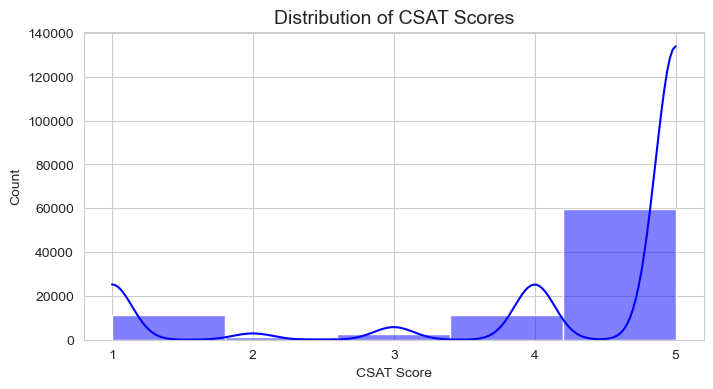

In [49]:
# Set style
sns.set_style("whitegrid")

plt.figure(figsize=(8, 4))
sns.histplot(df1["CSAT Score"], bins=5, kde=True, color="blue")
plt.title("Distribution of CSAT Scores", fontsize=14)
plt.xlabel("CSAT Score")
plt.ylabel("Count")
plt.xticks([1, 2, 3, 4, 5])
plt.show()

**Insights:**

The CSAT distribution is ***highly right-skewed***, with score **5 dominating** the feedback (60K responses approx), indicating that most customers are **highly satisfied**. However, the next highest counts are scores 1 and 4 (11K each approx), suggesting a noticeable segment of extremely dissatisfied customers despite overall strong satisfaction.

### 4.2: Distribution of Issue Categories

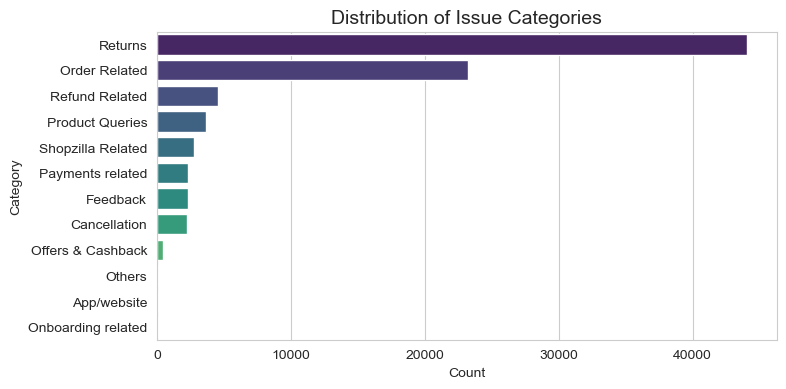

In [71]:
# Set style
sns.set_style("whitegrid")

plt.figure(figsize=(8, 4))
sns.countplot(y=df1["category"], order=df1["category"].value_counts().index, palette="viridis")
plt.title("Distribution of Issue Categories", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

**Insights:**

- **Customer complaints** are predominantly **centered around Returns and Order-Related concerns**, revealing operational inefficiencies in fulfillment and return workflows. 
- **Refund and Product-Related issues also contribute significantly**, suggesting the need for better refund clarity and accurate product details.
- **App/Website and Onboarding complaints remain minimal**, indicating comparatively strong technical performance. 

***Strengthening returns, order management, and refund processes will be crucial for improving overall customer satisfaction.***

### 4.3: Issue Categories by Support Channel

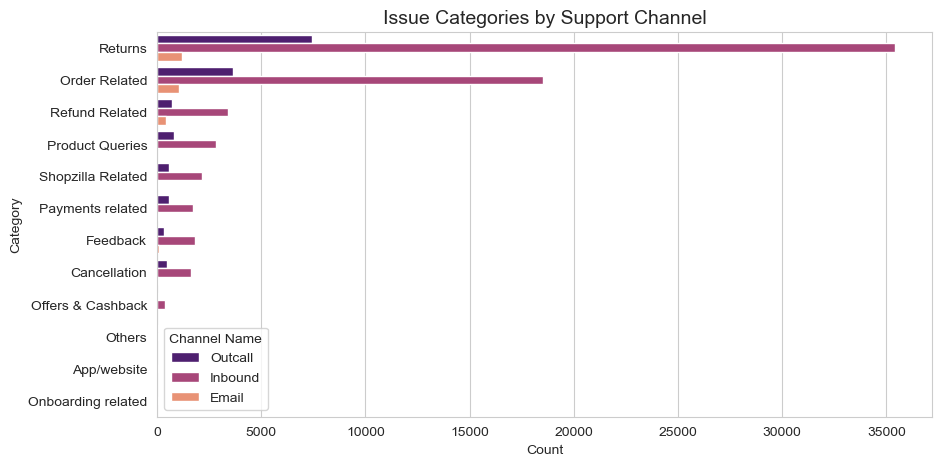

In [72]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df1["category"], hue=df1["channel_name"], order=df1["category"].value_counts().index, palette="magma")
plt.title("Issue Categories by Support Channel", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Category")
plt.legend(title="Channel Name")
plt.show()

**Insights:**

- **Returns and Order-related issues** account for the **highest customer interaction** volume, with **inbound channels dominating**, followed by outbound support. 
- **Refund and Product Queries** are also significant, but again **inbound is the primary channel** of engagement.
- **Email** usage remains **minimal across all categories.**
- **Outcall** support is **limited overall**, showing minimal proactive outreach. 
- **Offers & Cashback and App/Website** concerns show **negligible** interaction volumes, indicating they are not major customer pain points.

### 4.4: CSAT Scores by Agent Shift

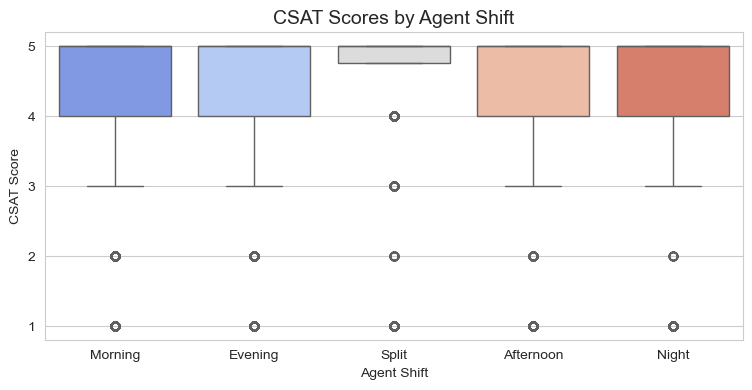

In [73]:
plt.figure(figsize=(9, 4))
sns.boxplot(x=df1["Agent Shift"], y=df1["CSAT Score"], palette="coolwarm")
plt.title("CSAT Scores by Agent Shift", fontsize=14)
plt.xlabel("Agent Shift")
plt.ylabel("CSAT Score")
plt.yticks([1,2,3,4,5])
plt.show()

**Insights:**

- **CSAT scores are consistently high across all agent shifts**, with most ratings clustered around 4-5.  
- **A few low scores (1-2) are present in all shifts**, indicating occasional dissatisfaction.  
- **Variability is minimal**, meaning customer satisfaction is not significantly impacted by agent shift timing.

### 4.5: CSAT Score by Agent Tenure

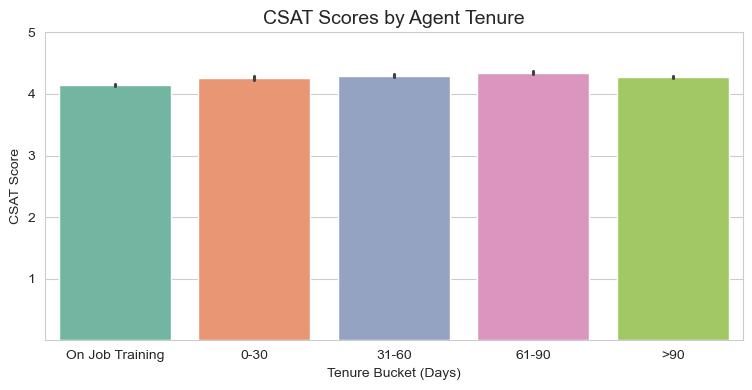

In [75]:
plt.figure(figsize=(9, 4))
sns.barplot(x=df1["Tenure Bucket"], y=df1["CSAT Score"], order=["On Job Training", "0-30", "31-60", "61-90", ">90"], palette="Set2")
plt.title("CSAT Scores by Agent Tenure", fontsize=14)
plt.xlabel("Tenure Bucket (Days)")
plt.ylabel("CSAT Score")
plt.yticks([1,2,3,4,5])
plt.show()

**Insights:**

- **CSAT scores remain high across all tenure buckets**, with most ratings around 4-5.  
- **On-the-job trainees perform similarly to experienced agents**, indicating effective training.  
- **Low scores (1-2) are present in all tenure groups**, suggesting occasional dissatisfaction is not tenure-dependent.  
- **Minimal variability across tenure buckets**, meaning agent **experience has little impact on CSAT scores**.

### 4.6: Agent Vs. Average Response Time Percentage (Bivariate with Categorical - Numerical)

In [52]:
# Create a new column for 'Response_Time_seconds' to calculate the average response time per agent

# Calculate response time
df1['Response_Time'] = df1['issue_responded'] - df1['Issue_reported at']

# Convert to seconds for aggregation
df1['Response_Time_seconds'] = df1['Response_Time'].dt.total_seconds()

           Agent_name  Average Response Time (seconds)
0    Christine Castro                     40915.714286
1  Virginia Mccormick                     34088.571429
2     Dennis Campbell                     32251.200000
3      Melissa Spence                     31560.000000
4       Glenda Powell                     31377.272727
5         John Nelson                     30621.052632
6           Ryan Khan                     30345.600000
7      Shane Humphrey                     30140.000000
8       Donald Jordan                     29545.714286
9      Elizabeth Rose                     29123.478261
 


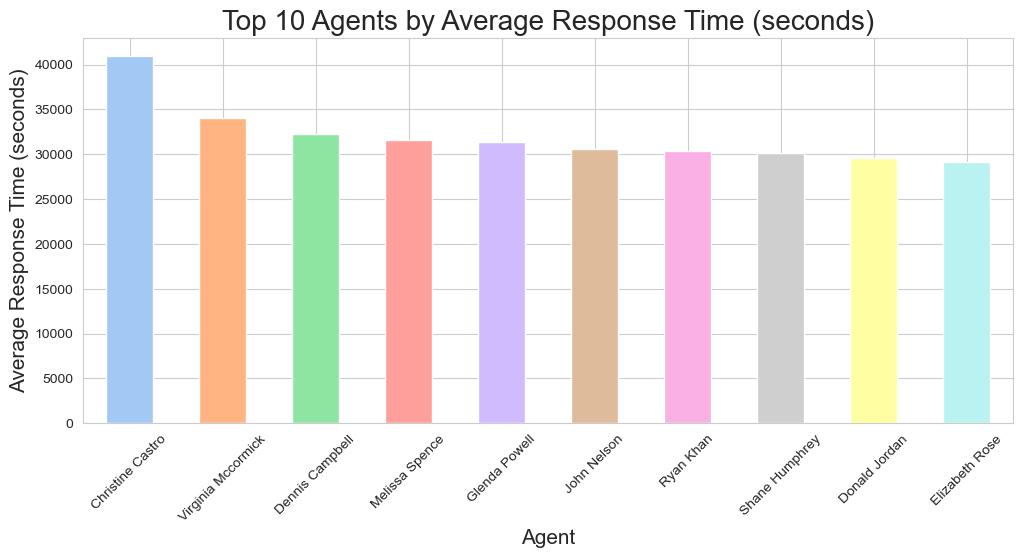

In [76]:
# Display top 10 agents with highest average response time
print(
    (df1.groupby(['Agent_name'])['Response_Time_seconds']
     .mean()
     .sort_values(ascending=False)
     .reset_index(name="Average Response Time (seconds)")
     .head(10))
)
print(" ")

# Visualization - Display top 10 Agents with highest average response time
plt.rcParams['figure.figsize'] = (12, 5)
top_agents = (df1.groupby(['Agent_name'])['Response_Time_seconds']
              .mean()
              .sort_values(ascending=False)
              .head(10))

palette = sns.color_palette("pastel", n_colors=len(top_agents))
top_agents.plot.bar(color=palette)

plt.title("Top 10 Agents by Average Response Time (seconds)", fontsize=20)
plt.xlabel('Agent', fontsize=15)
plt.ylabel('Average Response Time (seconds)', fontsize=15)
plt.xticks(rotation=45)
plt.show()


**Insights:**

- The dataset covers **10 agents** with varying average response times.
- Response times range between **2.09 to 4.09 hours**.
- **Top Performers:** ***Elizabeth Rose and Donald Jordan*** respond the quickest, demonstrating efficient client handling.
- **Improvement Area:** ***Christine Castro*** has the longest average response time, signaling a need for review and targeted training.


### 4.7: CSAT Score vs Item price (Bivariate)

CSAT Score
1    3339.239537
2    2296.834762
3    2141.081314
4    1797.410910
5    1653.371236
Name: Item_price, dtype: float64
 


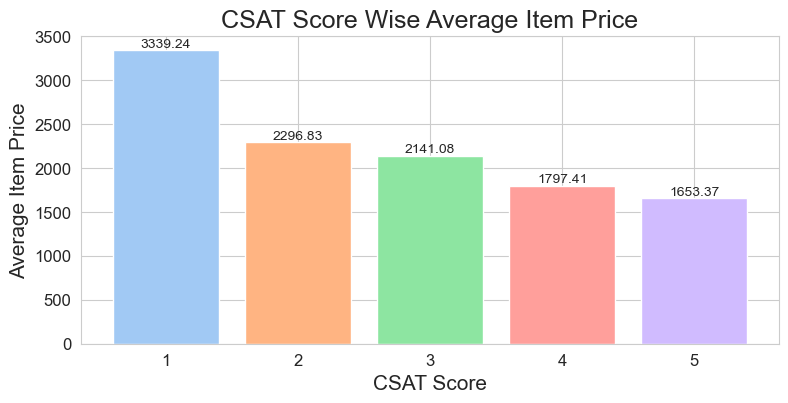

In [70]:
# Calculate the average item price by CSAT Score
csat_avg_item_price = df1.groupby('CSAT Score')['Item_price'].mean()
print(csat_avg_item_price)
print(" ")

# Visualizing the CSAT Score wise average item price
plt.figure(figsize=(9, 4))
palette = sns.color_palette("pastel", n_colors=len(csat_avg_item_price))
bars = plt.bar(csat_avg_item_price.index, csat_avg_item_price, color=palette)

# Adding labels and title
plt.xlabel('CSAT Score', fontsize=15)
plt.ylabel('Average Item Price', fontsize=15)
plt.title('CSAT Score Wise Average Item Price', fontsize=18)
plt.xticks(csat_avg_item_price.index, fontsize=12)
plt.yticks(fontsize=12)

# Adding value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Display the plot
plt.show()

**Insights:**

- The **average item price is highest when CSAT score = 1 (lowest satisfaction)**.
- The **average item price is lowest when CSAT score = 5 (highest satisfaction)**.

This indicates a clear **inverse relationship between item price and customer satisfaction**. Higher prices are generally linked to lower CSAT scores.

**Recommendation:** 
By aligning **pricing + value delivery** with customer expectations, businesses can simultaneously improve CSAT and loyalty. Example: If higher-priced items include faster support or exclusive benefits, customers will feel the price is justified.

By maintaining a balance between **price, value, and customer expectations**, companies can boost CSAT, retain customers, and ensure long-term growth while avoiding risks of negative financial impact.



### 4.8: Histogram & Box Plots (Univariate Analysis)

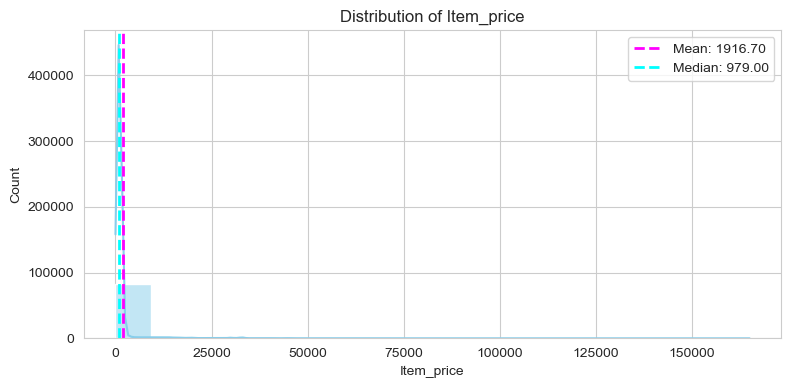

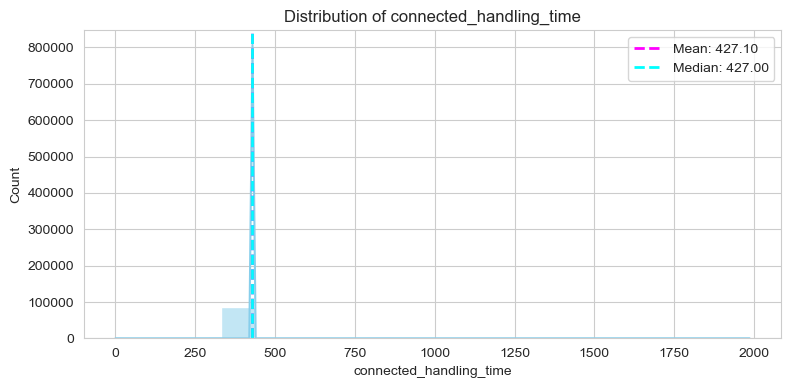

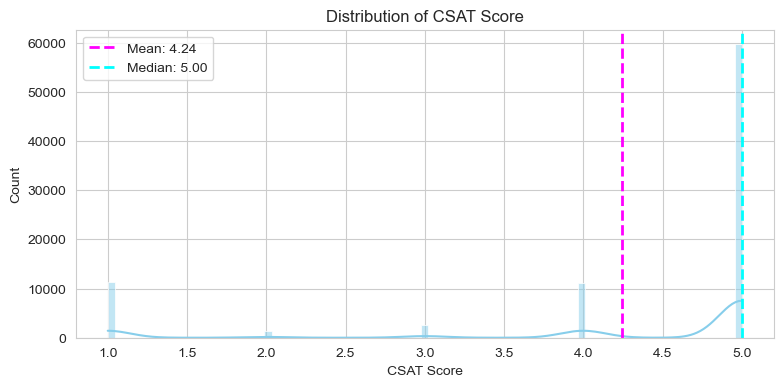

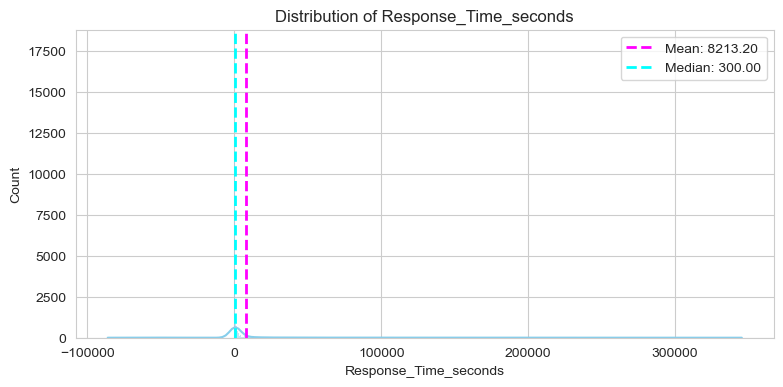

In [68]:
# Select only numeric columns
numeric_cols = df1.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols]

# Histogram + KDE for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(9, 4))
    feature = df1[col]

    # Histogram with KDE
    sns.histplot(feature, kde=True, color="skyblue")

    # Mean and Median Lines
    plt.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2, label=f"Mean: {feature.mean():.2f}")
    plt.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2, label=f"Median: {feature.median():.2f}")

    plt.title(f"Distribution of {col}")
    plt.legend()
    plt.show()


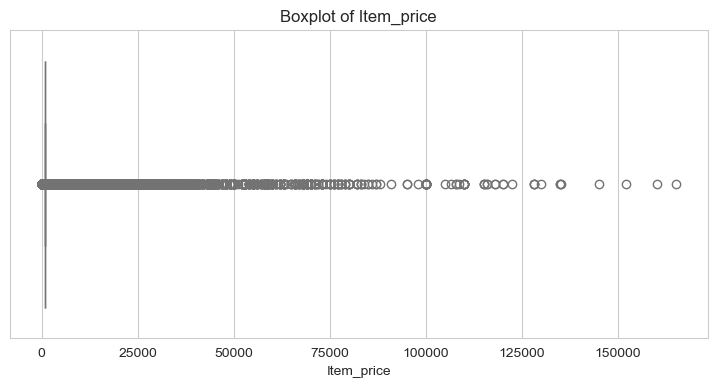

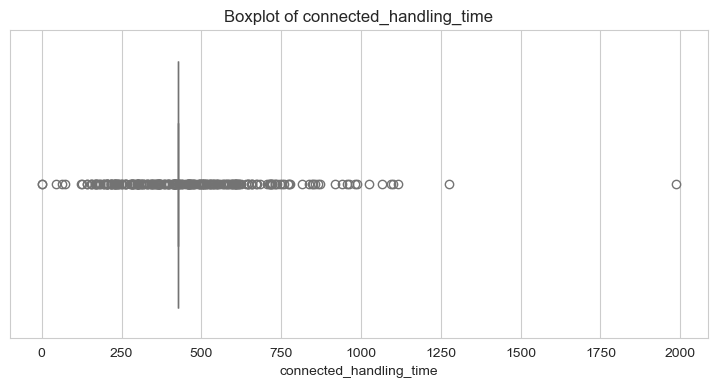

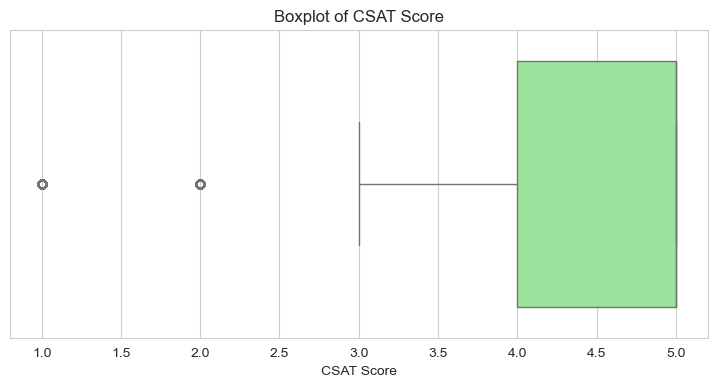

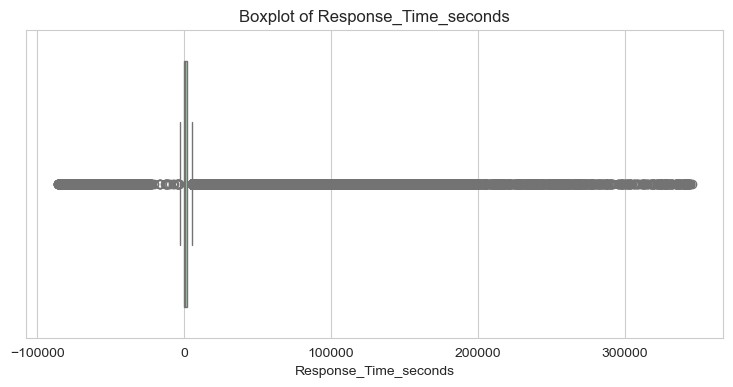

In [69]:
# Boxplots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(9, 4))
    sns.boxplot(x=df1[col], color="lightgreen")
    plt.title(f"Boxplot of {col}")
    plt.show()

Histograms and Box Plots are used together to capture both overall distribution patterns and specific details such as outliers, interquartile ranges, and summary statistics.

**Insights:**

- The **“Connected Handling Time”** feature is **symmetrically distributed**, with the mean closely aligned with the median, indicating relatively balanced data without significant skewness.
- The **“Item Price”** feature, however, shows a **skewed distribution with noise/outliers**, suggesting irregularities in data quality or variations that may need further investigation (e.g., incorrect entries, extreme values, or genuine high-value items).

**Impact:**

- Detecting outliers and skewness early helps in cleaning and preparing data, leading to more accurate models and insights.
- If ignored, skewed distributions or unaddressed outliers could mislead business decisions, leading to inaccurate demand forecasts, inefficient operations, or misaligned strategies.

While histograms and box plots themselves don’t deliver direct business outcomes, they enable better **data quality checks** and **informed decision-making**.

### 4.9: Correlation Heatmap

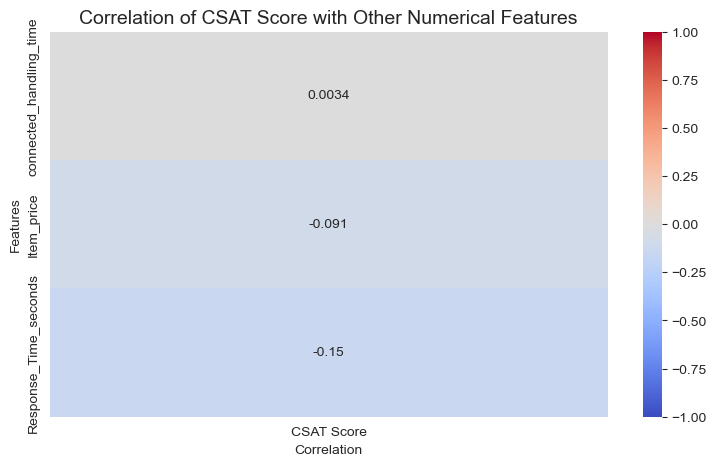

In [77]:
# Calculate correlation matrix for numerical features
correlation_matrix = df1.corr(numeric_only=True)

# Define target variable
target_variable = 'CSAT Score'

# Extract correlation of target with other features
correlation_with_target = (
    correlation_matrix[[target_variable]]
    .drop(index=target_variable)  # remove self-correlation
    .sort_values(by=target_variable, ascending=False)
)

# Plot heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(
    correlation_with_target,
    annot=True,
    cmap='coolwarm',
    cbar=True,
    vmin=-1, vmax=1
)
plt.title(f'Correlation of {target_variable} with Other Numerical Features', fontsize=14)
plt.ylabel("Features")
plt.xlabel("Correlation")
plt.show()

### 4.10: Pair Plot

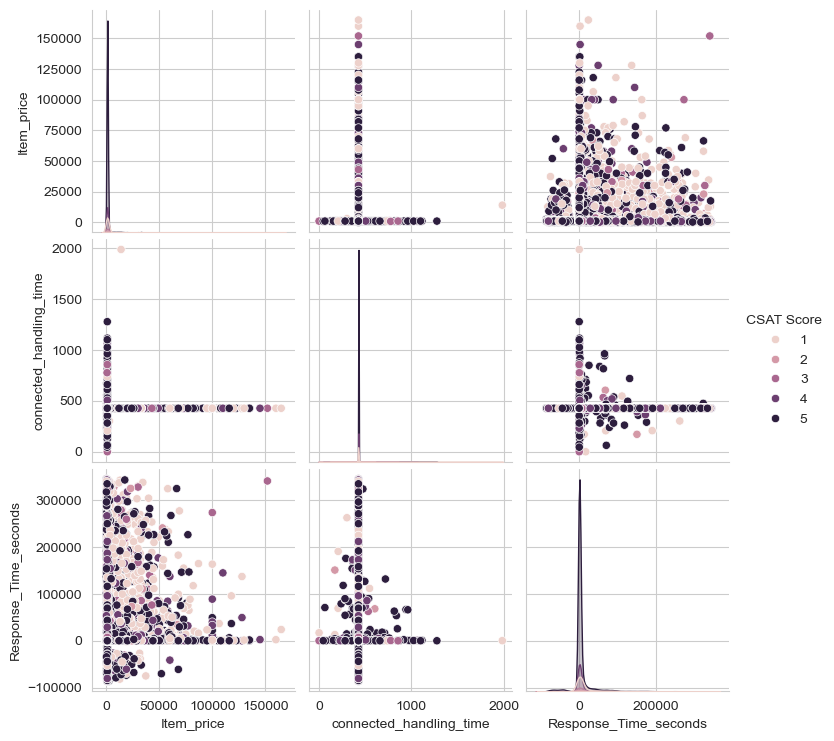

In [78]:
# Pair Plot visualization
sns.pairplot(df1, hue="CSAT Score")

**Insights:**

- Most variables do not show strong linear relationships, and the data points are not linearly separable.
- **Connected handling time** shows a fairly symmetrical distribution.
- **Item price** and **response time** are more skewed (non-symmetric) in nature.
- Among all features, **response time** seems to stand out as an important factor.
- The relationship between **connected handling time** and other features gives useful insights about customer interactions.

The pair plot highlights the complexity and overlaps in the data, showing that simple linear separation might not fully capture the patterns.

In [79]:
df1.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score', 'Response_Time', 'Response_Time_seconds'],
      dtype='object')

---
## **5. Outlier Detection and Removal**

#### 5.1: CSAT Score is categorical (only 1–5), so we convert it to string.

In [81]:
df1['CSAT Score'] = df1['CSAT Score'].astype(str)

In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   Unique id                85907 non-null  object         
 1   channel_name             85907 non-null  object         
 2   category                 85907 non-null  object         
 3   Sub-category             85907 non-null  object         
 4   Customer Remarks         85907 non-null  object         
 5   order_date_time          85907 non-null  datetime64[ns] 
 6   Issue_reported at        85907 non-null  datetime64[ns] 
 7   issue_responded          85907 non-null  datetime64[ns] 
 8   Survey_response_Date     85907 non-null  object         
 9   Customer_City            85907 non-null  object         
 10  Product_category         85907 non-null  object         
 11  Item_price               85907 non-null  float64        
 12  connected_handling

#### 5.2: Separate Symmetric and Skewed Features

- Symmetric: mean ≈ median - can use IQR or std-based outlier treatment
- Skewed: mean far from median - use mean ± 3*std

In [83]:
symmetric_features = []
skewed_features = []

# Select only numeric columns, exclude timedelta and object
numeric_cols = df1.select_dtypes(include=['int64', 'float64']).columns

# Drop identifier column
numeric_cols = numeric_cols.drop('Unique id', errors='ignore')

# Loop through numeric features
for col in numeric_cols:
    mean_val = df1[col].mean()
    median_val = df1[col].median()

    # Use relative difference between mean and median
    if abs(mean_val - median_val) / (abs(median_val) + 1e-9) < 0.2:
        symmetric_features.append(col)
    else:
        skewed_features.append(col)

print("Symmetric Distributed Features:", symmetric_features)
print("Skewed Distributed Features:", skewed_features)

Symmetric Distributed Features: ['connected_handling_time']
Skewed Distributed Features: ['Item_price', 'Response_Time_seconds']


### 5.3: Outlier Treatment


**5.3a: Symmetric Features (IQR Method)**

In [84]:
for feature in symmetric_features:
    Q1 = df1[feature].quantile(0.25)
    Q3 = df1[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df1.loc[df1[feature] < lower_bound, feature] = lower_bound
    df1.loc[df1[feature] > upper_bound, feature] = upper_bound

**5.3b: Skewed Features (Mean ± 3×STD)**

In [85]:
def outlier_treatment(df, feature):
    upper = df[feature].mean() + 3 * df[feature].std()
    lower = df[feature].mean() - 3 * df[feature].std()
    return upper, lower

for feature in skewed_features:
    upper, lower = outlier_treatment(df1, feature)
    df1.loc[df1[feature] > upper, feature] = upper
    df1.loc[df1[feature] < lower, feature] = lower

### 5.4: Visualize Outliers After Treatment

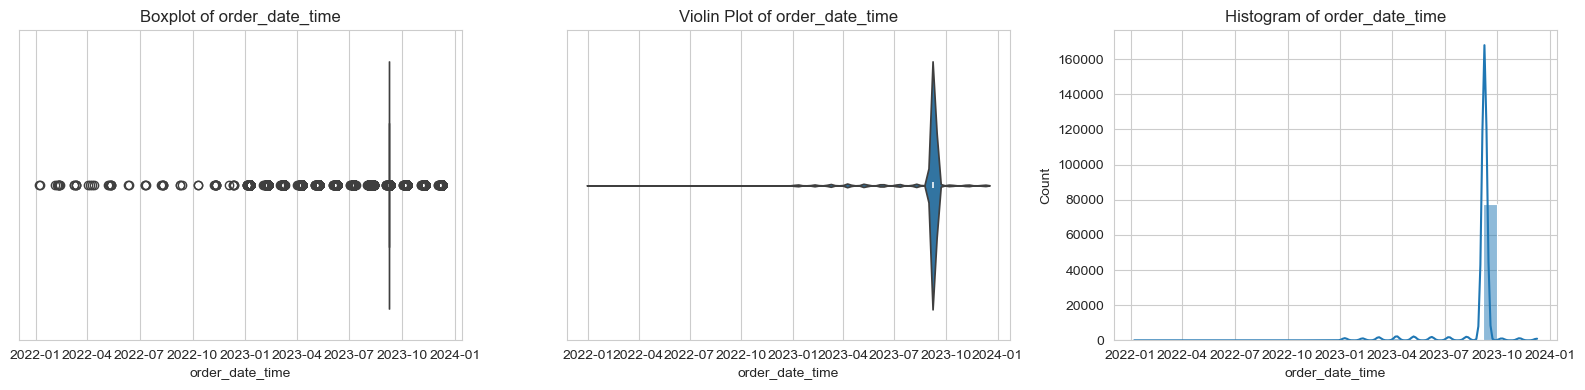

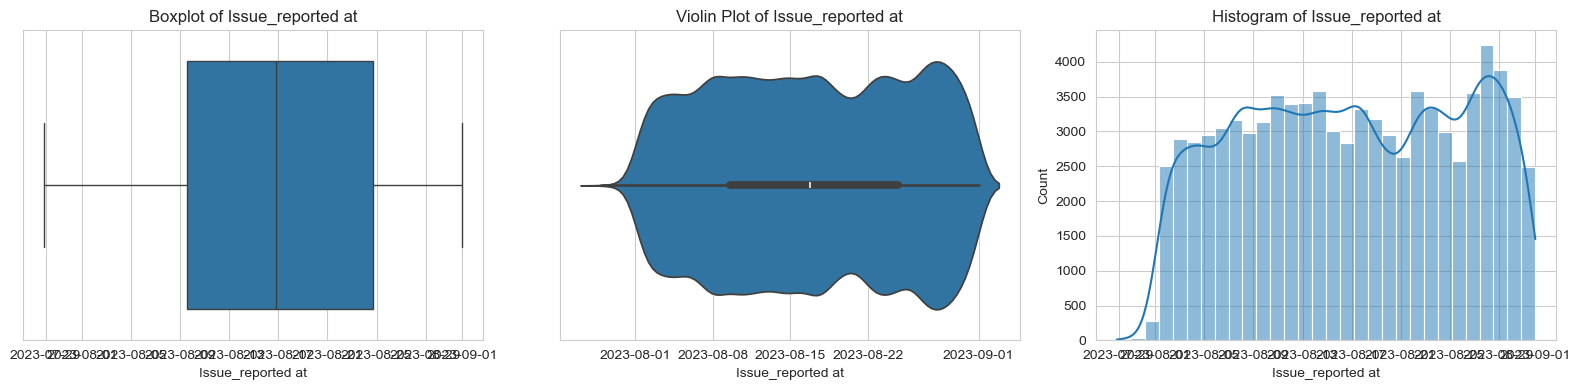

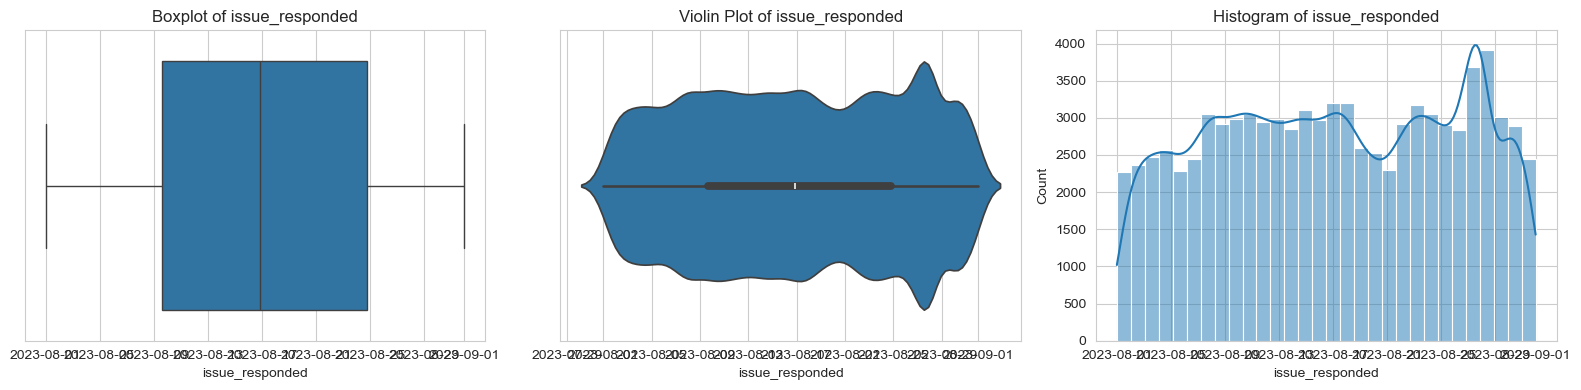

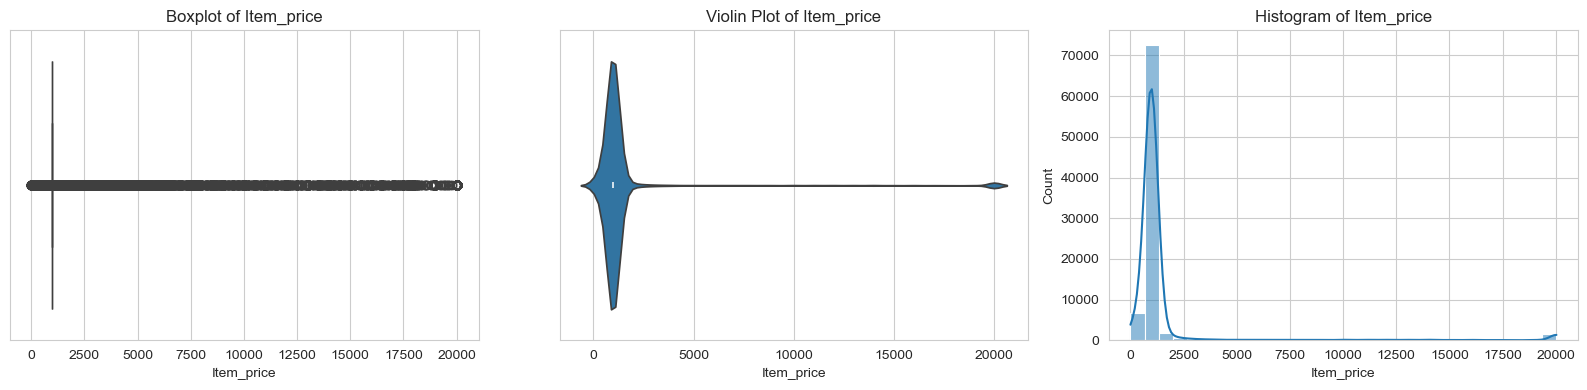

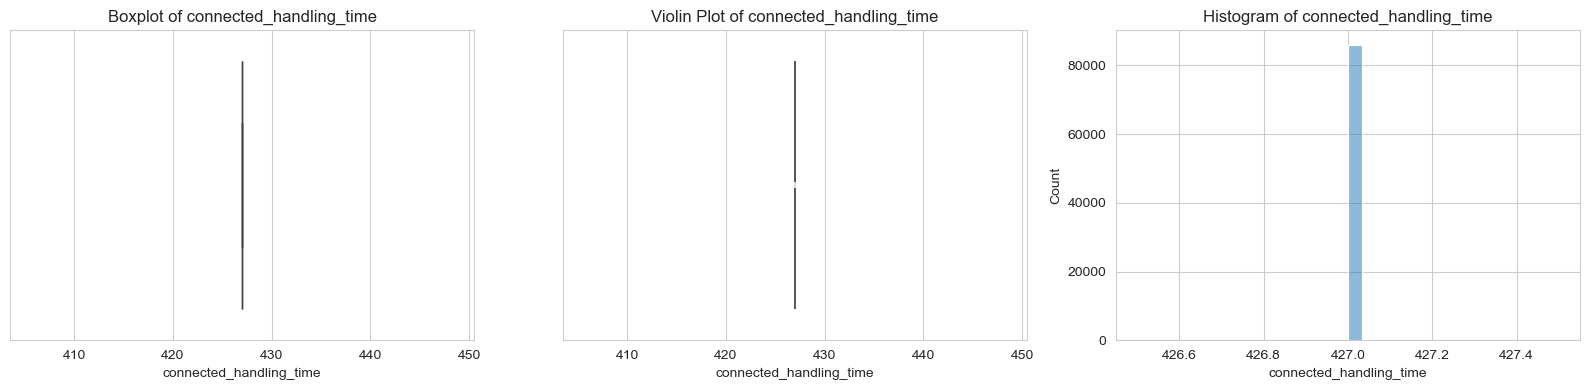


Skipping column Response_Time due to MemoryError



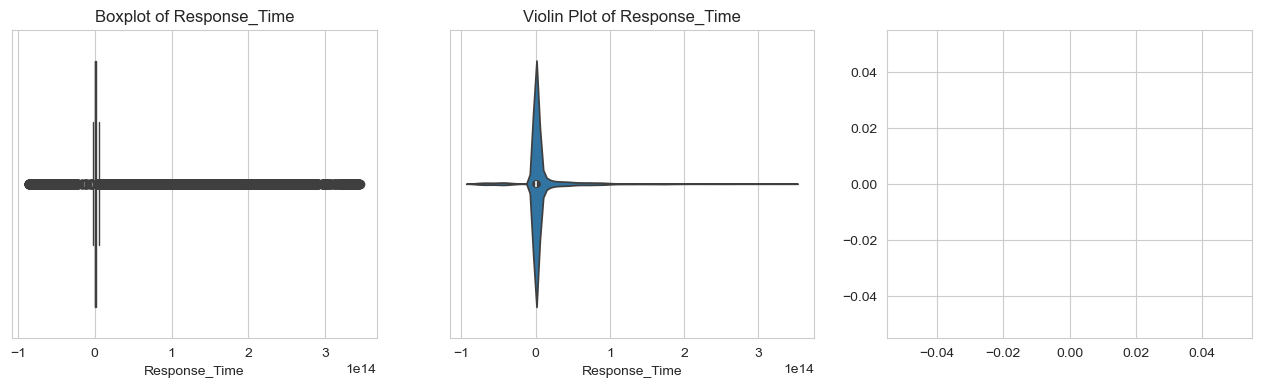

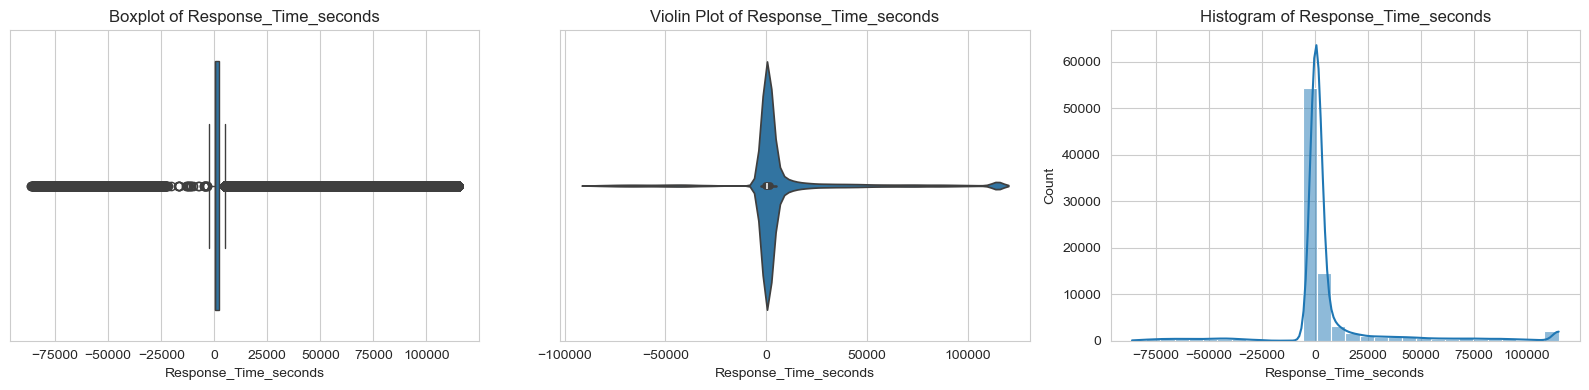

In [86]:
# Loop over numeric columns
for col in df1.describe().columns:
    try:
        plt.figure(figsize=(16,4))

        plt.subplot(1,3,1)
        sns.boxplot(x=df1[col])
        plt.title(f'Boxplot of {col}')

        plt.subplot(1,3,2)
        sns.violinplot(x=df1[col])
        plt.title(f'Violin Plot of {col}')

        plt.subplot(1,3,3)
        sns.histplot(df1[col], bins=30, kde=True)
        plt.title(f'Histogram of {col}')

        plt.tight_layout()
        plt.show()
    except MemoryError:
        print(f"\nSkipping column {col} due to MemoryError\n")
    except Exception as e:
        print(f"\nSkipping column {col} due to error: {e}\n")

### 5.5: Conclusion

- CSAT Score is treated as categorical; not affected by numeric outlier treatment.
- **Symmetric** features: Outliers were capped using **IQR method**, ensuring extreme values don’t distort models.
- **Skewed** features: Outliers were capped using mean **± 3×std**, reducing the impact of extreme high/low values while preserving most data points.
- Visualizations: Boxplots, violin plots, and histograms show that extreme outliers have been properly restricted and distributions are now cleaner.
- Overall: This approach balances data integrity and model stability, making the dataset ready for further analysis or modeling.

---
## **6. Feature Engineering**

In [87]:
# Create a copy of the dataset
df2 = df1.copy()

### Categorical Encoding

In [88]:
# Drop Unnecessary Column
df2.drop(columns=['Unique id'], inplace=True)

In [89]:
# Convert Target column
df2["CSAT Score"] = df2["CSAT Score"].astype(int)

**Create columns from datetime columns**

In [90]:
datetime_cols = ['order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date']

for col in datetime_cols:
    df2[col] = pd.to_datetime(df2[col], errors='coerce')
    df2[col + '_day'] = df2[col].dt.day
    df2[col + '_month'] = df2[col].dt.month
    df2[col + '_hour'] = df2[col].dt.hour
    df2[col + '_weekday'] = df2[col].dt.weekday

# Drop original datetime cols
df2.drop(columns=datetime_cols, inplace=True)

**Define categorical columns**

- Low cardinality - one-hot encoding
- High cardinality - label encoding

In [91]:
low_cardinality = ['channel_name','category','Sub-category',
                   'Tenure Bucket','Agent Shift','Product_category','Customer_City']

high_cardinality = ['Agent_name','Supervisor','Manager']

***One-hot encode low-cardinality categoricals***

In [92]:
df2 = pd.get_dummies(df2, columns=low_cardinality, drop_first=True)

***Label encode high-cardinality categoricals***

In [95]:
le = LabelEncoder()
for col in high_cardinality:
    df2[col] = le.fit_transform(df2[col].astype(str))

In [96]:
df3 = df2.copy()

### Text Feature Encoding using TF-IDF

Since Customer Remarks is a free-text, high-cardinality feature, we cannot apply one-hot or label encoding directly. Instead, we used TF-IDF (Term Frequency–Inverse Document Frequency), which transforms text into numerical vectors based on how important a word is in the corpus.

The top 100 keywords were extracted and new features were created representing the weight of each keyword in the remarks, making the text data usable for machine learning models.

In [97]:
tfidf = TfidfVectorizer(max_features=100)  # top 100 keywords
remarks_tfidf = tfidf.fit_transform(df3['Customer Remarks'])
remarks_df = pd.DataFrame(remarks_tfidf.toarray(), columns=tfidf.get_feature_names_out())
df3 = pd.concat([df3.reset_index(drop=True), remarks_df.reset_index(drop=True)], axis=1)

In [98]:
df3.columns

Index(['Customer Remarks', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'CSAT Score', 'Response_Time',
       'Response_Time_seconds', 'order_date_time_day',
       ...
       'to', 'very', 'was', 'we', 'will', 'with', 'work', 'worst', 'you',
       'your'],
      dtype='object', length=1991)

In [99]:
# Drop unnecessary columns
df3.drop(columns=['Customer Remarks','Response_Time'],inplace=True)

In [100]:
df_encoded = df3.copy()

In [102]:
# Checking the shape of dataset
df_encoded.shape

(85907, 1989)

In [103]:
df_encoded.columns

Index(['Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor',
       'Manager', 'CSAT Score', 'Response_Time_seconds', 'order_date_time_day',
       'order_date_time_month', 'order_date_time_hour',
       ...
       'to', 'very', 'was', 'we', 'will', 'with', 'work', 'worst', 'you',
       'your'],
      dtype='object', length=1989)

---
## **7. Feature Selection**

**Dropping Constant & Quasi-Constant Features**

Remove features with very low variance (<0.05) as these features don’t vary much and won’t contribute to prediction.

In [104]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Columns: 1989 entries, Item_price to your
dtypes: bool(1866), float64(103), int32(16), int64(4)
memory usage: 228.2 MB


In [107]:
# Select only numeric data
numeric_data = df_encoded.select_dtypes(include=['number'])

# Apply VarianceThreshold
var_thres = VarianceThreshold(threshold=0.05)
var_thres.fit(numeric_data)

# Columns that were kept
kept_cols = numeric_data.columns[var_thres.get_support()]

# Columns that were dropped (low variance)
dropped_cols = [col for col in numeric_data.columns if col not in kept_cols]

# Remove target if mistakenly added
if "CSAT Score" in dropped_cols:
    dropped_cols.remove("CSAT Score")

print("Number of low variance columns dropped:", len(dropped_cols))
print("Dropped columns:")
print(dropped_cols)

Number of low variance columns dropped: 104
Dropped columns:
['connected_handling_time', 'Issue_reported at_month', 'issue_responded_month', 'Survey_response_Date_month', 'Survey_response_Date_hour', 'after', 'agent', 'all', 'also', 'am', 'and', 'any', 'are', 'as', 'bad', 'be', 'behaviour', 'best', 'but', 'by', 'call', 'can', 'care', 'customer', 'customers', 'delivered', 'delivery', 'do', 'don', 'excellent', 'executive', 'experience', 'for', 'from', 'give', 'happy', 'has', 'have', 'he', 'help', 'helpful', 'if', 'in', 'information', 'is', 'issue', 'it', 'like', 'make', 'me', 'more', 'much', 'my', 'need', 'nice', 'no', 'not', 'of', 'ok', 'on', 'one', 'or', 'order', 'person', 'please', 'policy', 'poor', 'problem', 'product', 'products', 'provide', 'refund', 'resolve', 'resolved', 'return', 'service', 'she', 'shopzilla', 'should', 'sir', 'so', 'solve', 'solved', 'support', 'talk', 'team', 'thank', 'thanks', 'that', 'the', 'there', 'they', 'this', 'time', 'to', 'very', 'was', 'we', 'will', 

In [108]:
def dropping_constant(data):
    numeric_data = data.select_dtypes(include=['number'])
    var_thres = VarianceThreshold(threshold=0.05)  # remove near-constant features
    var_thres.fit(numeric_data)

    concol = [column for column in numeric_data.columns
              if column not in numeric_data.columns[var_thres.get_support()]]
    if "CSAT Score" in concol:
        concol.remove("CSAT Score")

    df_removed_var = data.drop(concol, axis=1)
    return df_removed_var

# Remove low variance columns from the df
df_removed_var = dropping_constant(df_encoded)

In [109]:
df_removed_var.shape

(85907, 1885)

**Check Multicollinearity (VIF)**

- VIF > 5 (or 10) indicates high multicollinearity.
- Highly collinear features can be dropped to reduce redundancy and improve model stability.

In [111]:
numeric_data = df_removed_var.select_dtypes(include=['number'])
numeric_data.drop(columns=['CSAT Score'], inplace=True)

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

vif_results = calculate_vif(numeric_data)
print(vif_results)

                         Feature         VIF
0                     Item_price    1.313191
1                     Agent_name    4.033282
2                     Supervisor    3.689957
3                        Manager    3.110196
4          Response_Time_seconds    1.137725
5            order_date_time_day  139.477691
6          order_date_time_month   50.805818
7           order_date_time_hour   28.678728
8        order_date_time_weekday   36.714128
9          Issue_reported at_day  129.773928
10        Issue_reported at_hour   16.679337
11     Issue_reported at_weekday   19.664413
12           issue_responded_day         inf
13          issue_responded_hour   12.493458
14       issue_responded_weekday         inf
15      Survey_response_Date_day         inf
16  Survey_response_Date_weekday         inf
17                          good    3.644619


### Correlation Heatmap After Highly Correlated Feature Removal

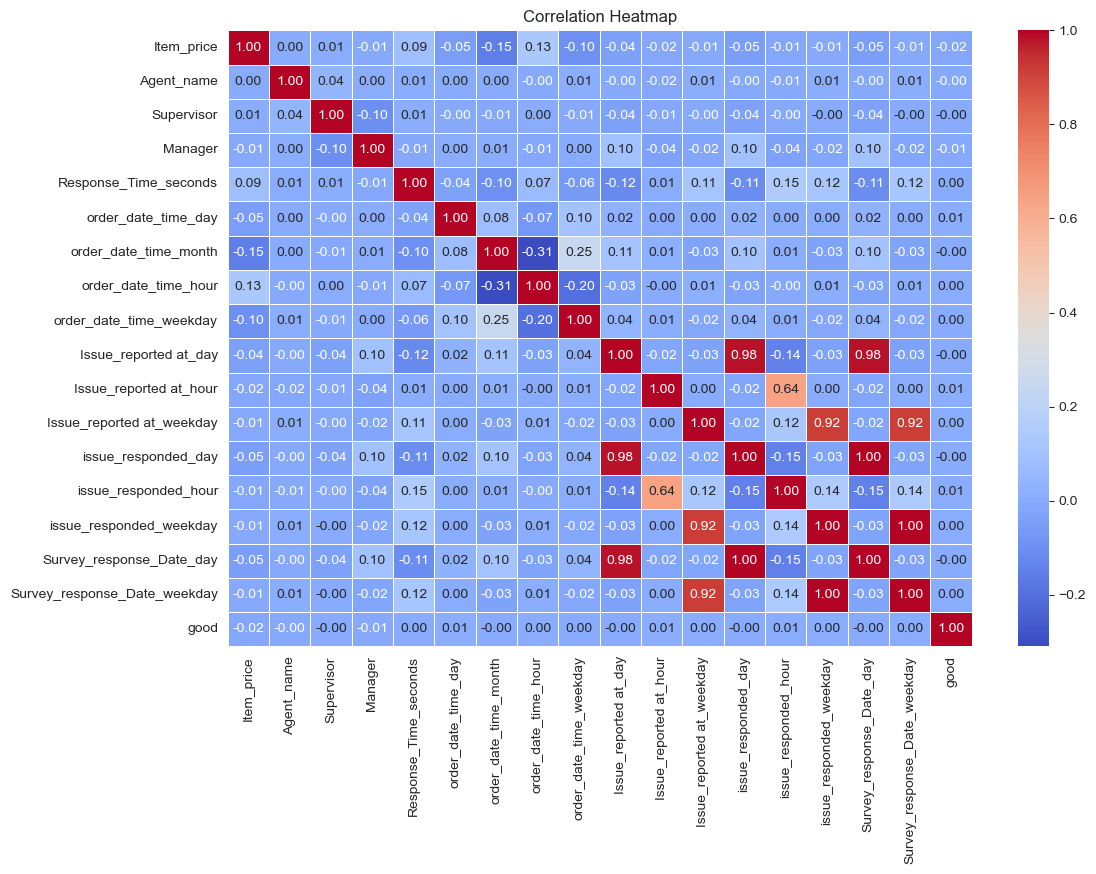

In [114]:
corr = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Drop features with correlation > 0.5
def correlation(df, threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return list(col_corr)

highly_correlated_columns = correlation(numeric_data, 0.5)
df_removed = df_removed_var.drop(highly_correlated_columns, axis=1)

**Check VIF Again After Dropping**

In [115]:
numeric_data = df_removed.select_dtypes(include=['number'])
numeric_data.drop(columns=['CSAT Score'], inplace=True)
vif_results = calculate_vif(numeric_data)
print(vif_results)

                      Feature         VIF
0                  Item_price    1.311731
1                  Agent_name    4.033198
2                  Supervisor    3.689951
3                     Manager    3.109301
4       Response_Time_seconds    1.104978
5         order_date_time_day  139.081879
6       order_date_time_month   50.732011
7        order_date_time_hour   28.674937
8     order_date_time_weekday   36.710057
9       Issue_reported at_day    4.607819
10     Issue_reported at_hour    9.460116
11  Issue_reported at_weekday    3.151109
12                       good    3.644590


In [116]:
df_removed.shape

(85907, 1880)

In [117]:
cols_to_drop = ['order_date_time_day', 'order_date_time_month','order_date_time_weekday']
df_removed.drop(columns=cols_to_drop, inplace=True)

In [118]:
df_removed.isnull().sum()

Item_price                  0
Agent_name                  0
Supervisor                  0
Manager                     0
CSAT Score                  0
                           ..
Customer_City_ZAMANIA       0
Customer_City_ZIRA          0
Customer_City_ZIRAKPUR      0
Customer_City_ZUARINAGAR    0
good                        0
Length: 1877, dtype: int64

**Feature selection methods used and why?**

1. **Dropping constant and quasi-constant features:**`VarianceThreshold` method used since features with very low variance contribute little to prediction and can add noise.
2. **Correlation analysis:** Calculated pairwise correlation and dropped features with correlation > 0.5. This helped to remove redundant features and reduce multicollinearity.
3. **Variance Inflation Factor (VIF):**`variance_inflation_factor` from `statsmodels` used to detect multicollinearity among numeric features. Features with *VIF > 10 (or infinity) were dropped*.
4. **Dropping highly collinear datetime features** Removed raw datetime/day/hour/weekday columns since these features had extremely high VIF (perfect multicollinearity) and could negatively impact model performance.

**Important features**

1. **Numeric / Encoded Features:**
   - `Item_price`, `Response_Time_seconds`, `Agent_name`, `Supervisor`, `Manager`, `Customer_City_FE` since these features have low multicollinearity.

2. **Issue-related Features:**
   - `Issue_reported_at_day`, `Issue_reported_at_hour`, `Issue_reported_at_weekday` since these features capture when issues are reported, influencing customer satisfaction.

---
## **8. Data Transformation and Handling Skewed Features**

In [119]:
df_removed.columns

Index(['Item_price', 'Agent_name', 'Supervisor', 'Manager', 'CSAT Score',
       'Response_Time_seconds', 'order_date_time_hour',
       'Issue_reported at_day', 'Issue_reported at_hour',
       'Issue_reported at_weekday',
       ...
       'Customer_City_YELESWARAM', 'Customer_City_YEOTAMAL',
       'Customer_City_YERRAGUNTLA', 'Customer_City_Yeola',
       'Customer_City_ZAHEERABAD', 'Customer_City_ZAMANIA',
       'Customer_City_ZIRA', 'Customer_City_ZIRAKPUR',
       'Customer_City_ZUARINAGAR', 'good'],
      dtype='object', length=1877)

In [120]:
# Continuous numeric features
continuous_features = [
    'Item_price',
    'Response_Time_seconds',
    'order_date_time_hour',
    'Issue_reported at_weekday','Issue_reported at_hour', 'Issue_reported at_day'
]

# Iterative transformations to reduce skew
def transform_numeric_features(df, features):
    df_transformed = df.copy()
    for col in features:
        # Apply 0.25th power for heavy skewed features
        if col == 'Item_price':
            df_transformed[col] = df_transformed[col] ** 0.25
        # Apply sqrt transformation to moderate skew
        else:
            df_transformed[col] = np.sqrt(df_transformed[col])

        # Apply one more sqrt if still skewed
        if abs(df_transformed[col].skew()) > 1:
            df_transformed[col] = np.sqrt(df_transformed[col])
    return df_transformed

df_transformed = transform_numeric_features(df_removed, continuous_features)


In [121]:
# Check symmetry vs skew
def check_symmetry(df, features, threshold=0.25):
    symmetric = []
    skewed = []
    for col in features:
        if abs(df[col].mean() - df[col].median()) < threshold:
            symmetric.append(col)
        else:
            skewed.append(col)
    return symmetric, skewed

symmetric_features, skewed_features = check_symmetry(df_transformed, continuous_features)
print("Symmetric features after transformation:", symmetric_features)
print("Skewed features after transformation:", skewed_features)

Symmetric features after transformation: ['Item_price', 'order_date_time_hour', 'Issue_reported at_weekday', 'Issue_reported at_hour', 'Issue_reported at_day']
Skewed features after transformation: ['Response_Time_seconds']


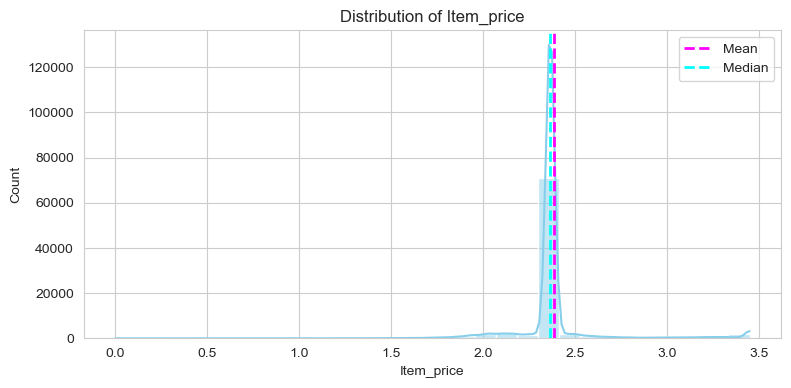

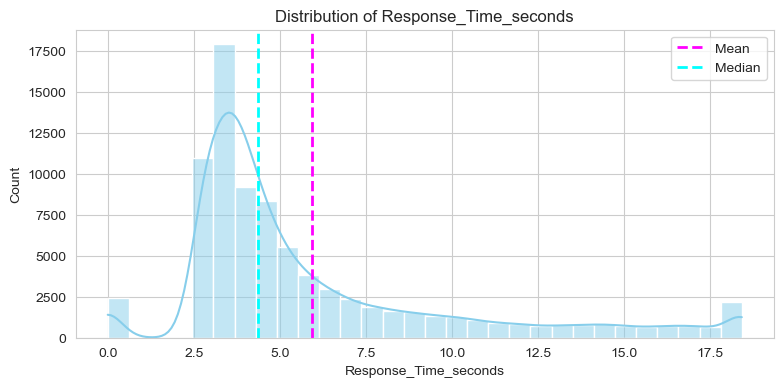

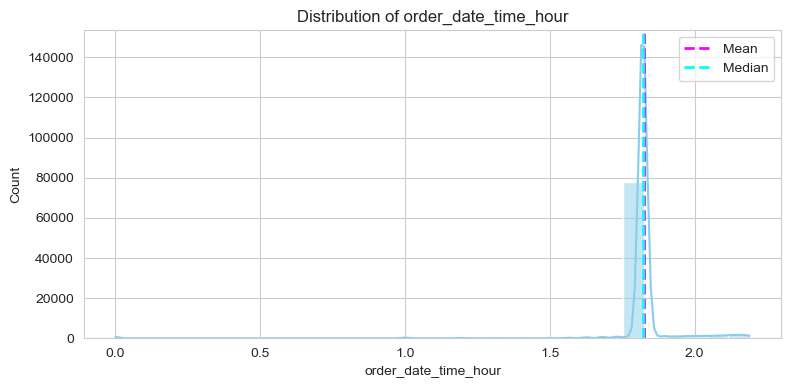

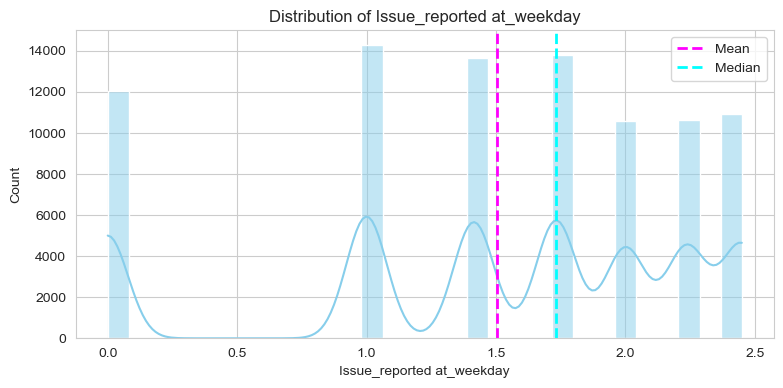

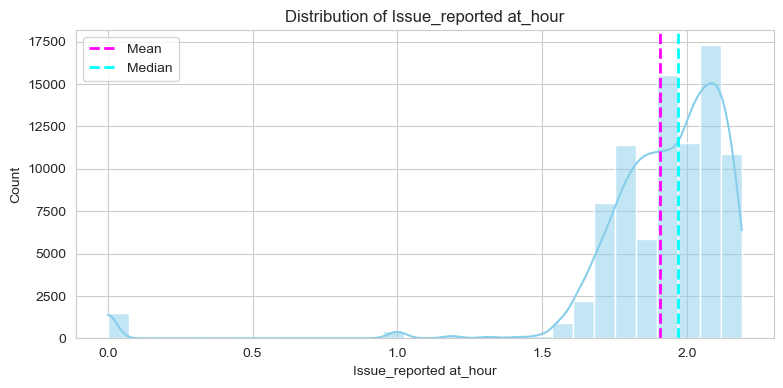

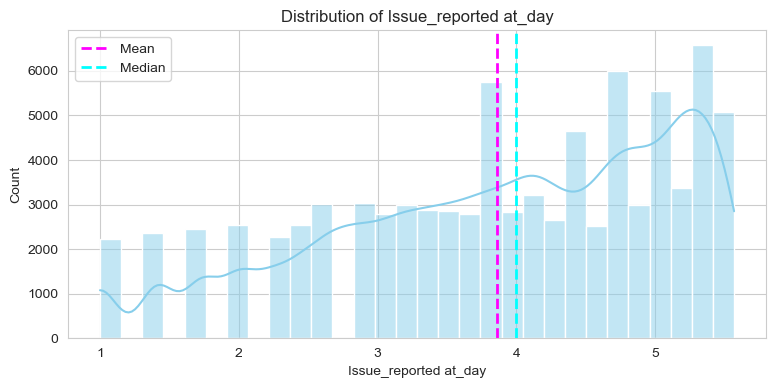

In [122]:
# Visualize distributions
def plot_distributions(df, features):
    for col in features:
        plt.figure(figsize=(9,4))
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
        plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2, label='Median')
        plt.title(f'Distribution of {col}')
        plt.legend()
        plt.show()

plot_distributions(df_transformed, continuous_features)

**Identification and Transformation of Symmetric vs Skewed Features**

1. ***Calculated the absolute difference between mean and median*** for each numeric feature.
    - Features where |mean - median| < 0.25 - symmetric distribution.
    - Features where |mean - median| ≥ 0.25 - skewed distribution.

    This was done because Skewed features often negatively impact model performance; symmetric features are already well-behaved.

2. ***Applied Transformations to Reduce Skew***
   Applied square root (np.sqrt) or 0.25th power transformation on skewed features to make distributions more symmetric:
    - Item_price → sqrt / 0.25 power
    - Response_Time_seconds → sqrt
    - day_number_order_date → 0.25 power
    - day_number_response_date → 0.25 power

    Transforming skewed features helps neural networks converge faster and improves prediction stability.

3. ***Iterative Checking***
    - After each transformation, recalculated symmetric vs skewed features to confirm improved distribution.
    This ensures that transformations effectively reduce skewness before training.

4. ***Visualization***
    - Plotted histograms (sns.distplot) with mean and median lines to visually check the distribution of transformed features.
    This confirms the effectiveness of transformations and highlights features that still need attention.

**Important Notes**
- CSAT Score was excluded from skew/symmetric checks as it is the target variable.
- Only numeric predictive features were transformed; categorical features and encoding were retained as-is.

**Result**
- Skewed numeric features were transformed to be closer to symmetric distributions.
- Neural network will have better convergence and improved performance on transformed inputs.

---
## **9.Data Scaling**

In [123]:
# Make a copy of your transformed dataset
final_df = df_transformed.copy()

In [124]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Columns: 1877 entries, Item_price to good
dtypes: bool(1866), float64(7), int64(4)
memory usage: 160.1 MB


In [125]:
# Separate target variable
y = final_df['CSAT Score']
X = final_df.drop(columns=['CSAT Score'])

# Select only continuous numeric columns for scaling
continuous_features = [
    'Item_price',
    'Response_Time_seconds',
    'order_date_time_hour',
    'Issue_reported at_weekday','Issue_reported at_hour', 'Issue_reported at_day'
]

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling only on continuous features
X[continuous_features] = scaler.fit_transform(X[continuous_features])

# Save the fitted scaler for use in model deployment
joblib.dump(scaler, "scaler.pkl")

# Combine scaled X with target back if needed
df_scaled = X.copy()
df_scaled['CSAT Score'] = y

# Preview final scaled dataset
print(df_scaled.head())


   Item_price  Agent_name  Supervisor  Manager  Response_Time_seconds  \
0    -0.09226        1072          26        1               0.188836   
1    -0.09226        1323           9        3              -0.639353   
2    -0.09226         370          18        5               0.020567   
3    -0.09226        1024          33        2              -0.013894   
4    -0.09226         247           4        3              -0.639353   

   order_date_time_hour  Issue_reported at_day  Issue_reported at_hour  \
0              -0.02739              -2.326293               -0.277868   
1              -0.02739              -2.326293               -0.148142   
2              -0.02739              -2.326293                0.673090   
3              -0.02739              -2.326293                0.673090   
4              -0.02739              -2.326293               -0.416766   

   Issue_reported at_weekday  channel_name_Inbound  channel_name_Outcall  \
0                  -0.661443            

**Continuous numerical variables** (`Item_price`, `Response_Time_seconds`, `Issue_reported at_day`, and `Issue_reported at_hour`) were transformed using **StandardScaler**, which rescales values to have a mean of 0 and a standard deviation of 1 thereby ensuring that features contribute equally during model training.

**Reason for choosing StandardScaler:** The numerical features approximately follow a **Gaussian (normal) distribution**, which makes standardization more appropriate. Unlike MinMaxScaler, which scales values to a fixed range (0–1) and can be sensitive to outliers, StandardScaler preserves the distribution shape and handles outliers better for normally distributed data.

Categorical features encoded through **One-Hot Encoding** or **Label Encoding** were excluded from scaling, as they are already in a machine-learning-friendly format. 

The fitted scaler was saved (`scaler.pkl`) to maintain consistency during future predictions and deployment.



---
## **10. Data Splitting**

In [126]:
# Separate features and target
X = df_transformed.drop(columns=['CSAT Score'])
y = df_transformed['CSAT Score'].values.reshape(-1, 1)

# One-Hot Encode the target
encoder = OneHotEncoder(sparse_output=False)
y_one_hot = encoder.fit_transform(y)

# Convert encoded target into DataFrame
y_one_hot_df = pd.DataFrame(
    y_one_hot,
    columns=[f'class_{int(i)}' for i in range(y_one_hot.shape[1])]
)

# Train-Test Split (70:30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_one_hot_df, test_size=0.3, random_state=0, stratify=y
)

# Save Feature List & Encoder
features_list = X_train.columns.to_list()
joblib.dump(features_list, "features.pkl")
joblib.dump(encoder, "target_encoder.pkl")

# Print Dataset Shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60134, 1876)
y_train shape: (60134, 5)
X_test shape: (25773, 1876)
y_test shape: (25773, 5)


In [127]:
# Save Feature List
features_list = X_train.columns.to_list()

# Save feature list using joblib
import joblib
joblib.dump(features_list, "features.pkl")

print("Feature list saved successfully! Total features:", len(features_list))

Feature list saved successfully! Total features: 1876


The dataset was divided into **training (70%) and testing (30%)** subsets to assess model performance on unseen data. The target variable, CSAT (0–5 rating), was transformed using **One-Hot Encoding** to represent it as multiple classes suitable for deep learning models.  

Additionally, the **feature list** was saved (`features.pkl`) to preserve the exact column order for future predictions, deployment and reproducibility of the pipeline.

---
## **11. Handling Class Imbalance**

**Convert One-Hot Target to Integer Labels**

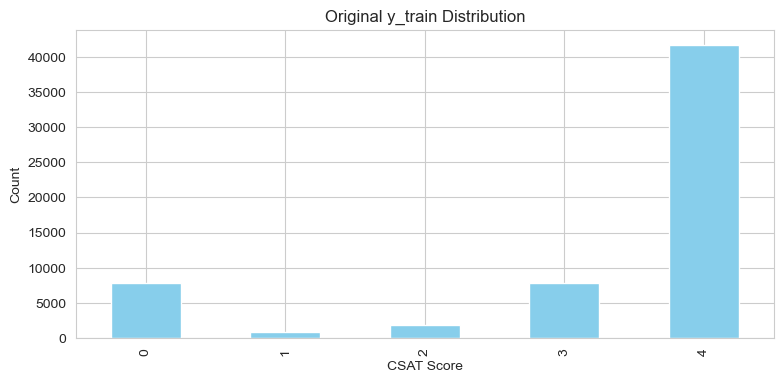

In [128]:
# Convert one-hot encoded y_train back to integer labels for SMOTE
y_series = y_train.idxmax(axis=1).apply(lambda x: int(x.split('_')[1]))

# Visualize the original distribution
plt.figure(figsize=(9,4))
y_series.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Original y_train Distribution")
plt.xlabel("CSAT Score")
plt.ylabel("Count")
plt.show()

In [129]:
# Check for missing values in training data
missing_counts = X_train.isna().sum()
print(missing_counts[missing_counts > 0])

Response_Time_seconds    2196
dtype: int64


In [131]:
# Impute numerical columns with median
num_cols = ['Item_price', 'Response_Time_seconds', 'Issue_reported at_day', 'Issue_reported at_hour']
imputer = SimpleImputer(strategy='median')

X_train[num_cols] = imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer.transform(X_test[num_cols])

In [132]:
df_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Columns: 1877 entries, Item_price to good
dtypes: bool(1866), float64(3), int32(4), int64(4)
memory usage: 158.8 MB


In [134]:
# Encode categorical columns
cat_cols = X_train.select_dtypes(include=['object']).columns

if len(cat_cols) > 0:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

    # Fit on train, transform both train & test
    X_train_encoded = encoder.fit_transform(X_train[cat_cols])
    X_test_encoded = encoder.transform(X_test[cat_cols])

    # Convert back to DataFrames with feature names
    encoded_cols = encoder.get_feature_names_out(cat_cols)
    X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)
    X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_cols, index=X_test.index)

    # Drop original categorical cols and concat encoded ones
    X_train = pd.concat([X_train.drop(columns=cat_cols), X_train_encoded], axis=1)
    X_test = pd.concat([X_test.drop(columns=cat_cols), X_test_encoded], axis=1)

**Apply SMOTE to Handle Imbalance**

In [135]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only on training data
X_train_res, y_train_res_labels = smote.fit_resample(X_train, y_series)

**One-Hot Encode Resampled Target**

In [136]:
encoder = OneHotEncoder(sparse_output=False)
y_train_res = encoder.fit_transform(y_train_res_labels.values.reshape(-1,1))
y_train_res = pd.DataFrame(y_train_res, columns=[f'class_{i}' for i in range(y_train_res.shape[1])])

**Visualize Resampled Distribution**

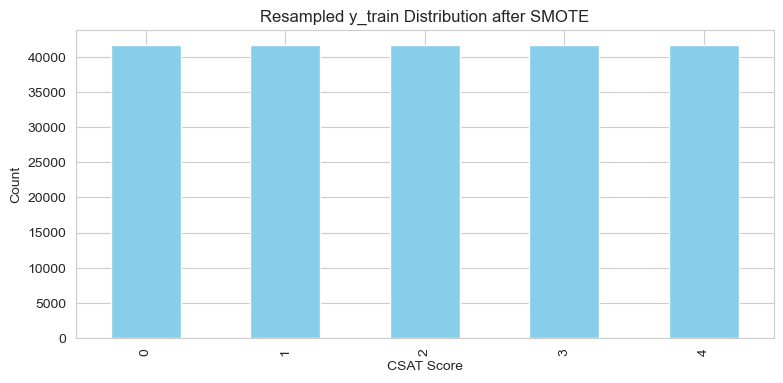

In [137]:
plt.figure(figsize=(9,4))
y_train_res_labels.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Resampled y_train Distribution after SMOTE")
plt.xlabel("CSAT Score")
plt.ylabel("Count")
plt.show()

In [138]:
# Check Train and Test Dataset Shapes After SMOTE

print("Number of transactions in X_train dataset: ", X_train_res.shape)
print("Number of transactions in y_train dataset: ", y_train_res.shape)
print("Number of transactions in X_test dataset: ", X_test.shape)
print("Number of transactions in y_test dataset: ", y_test.shape)

Number of transactions in X_train dataset:  (208655, 1876)
Number of transactions in y_train dataset:  (208655, 5)
Number of transactions in X_test dataset:  (25773, 1876)
Number of transactions in y_test dataset:  (25773, 5)


To address the **imbalance in the target variable (`CSAT Score`)**, the **SMOTE (Synthetic Minority Over-sampling Technique)** algorithm was applied on the training dataset. SMOTE generates synthetic samples for minority classes to balance the distribution, ensuring that the model does not become biased toward the majority class.

Before applying SMOTE, missing values in numerical features (`Response_Time_seconds`, `Item_price`, `Issue_reported at_day`, `Issue_reported at_hour`) were handled using **median imputation** ensuring that the resampling process does not encounter errors due to `NaN` values, while also preserving the distribution of the original data.

After resampling, the target variable was **one-hot encoded** for compatibility with multi-class classification models. 

Finally, a bar chart visualization confirms that the resampled training dataset now has a **balanced class distribution**.

---
## **12. Pre-Model Data Verification**

In [141]:
# Check shapes
print("X_train_resampled shape:", X_train_res.shape)
print("y_train_resampled shape:", y_train_res.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("\n**********************************************************************************************")

# Check for missing values
print("\nMissing values in X_train_resampled:\n", X_train_res.isna().sum())
print("\nMissing values in X_test:\n", X_test.isna().sum())
print("\nMissing values in y_train_resampled:\n", y_train_res.isna().sum())
print("\nMissing values in y_test:\n", y_test.isna().sum())
print("\n**********************************************************************************************")

# Check data types
print("\nX_train_resampled data types:\n", X_train_res.dtypes)
print("\nX_test data types:\n", X_test.dtypes)
print("\n**********************************************************************************************")

# Check if categorical features are encoded consistently
categorical_cols_train = X_train_res.select_dtypes(include=['bool', 'object']).columns.tolist()
categorical_cols_test = X_test.select_dtypes(include=['bool', 'object']).columns.tolist()
print("\nCategorical columns in train:", categorical_cols_train)
print("Categorical columns in test:", categorical_cols_test)
print("\n**********************************************************************************************")

# Check target distribution after SMOTE
print("\nTarget distribution after SMOTE:\n", y_train_res.value_counts())
print("\n**********************************************************************************************")

X_train_resampled shape: (208655, 1876)
y_train_resampled shape: (208655, 5)
X_test shape: (25773, 1876)
y_test shape: (25773, 5)

**********************************************************************************************

Missing values in X_train_resampled:
 Item_price                  0
Agent_name                  0
Supervisor                  0
Manager                     0
Response_Time_seconds       0
                           ..
Customer_City_ZAMANIA       0
Customer_City_ZIRA          0
Customer_City_ZIRAKPUR      0
Customer_City_ZUARINAGAR    0
good                        0
Length: 1876, dtype: int64

Missing values in X_test:
 Item_price                  0
Agent_name                  0
Supervisor                  0
Manager                     0
Response_Time_seconds       0
                           ..
Customer_City_ZAMANIA       0
Customer_City_ZIRA          0
Customer_City_ZIRAKPUR      0
Customer_City_ZUARINAGAR    0
good                        0
Length: 1876, dtype:

Following are the pre-model training data checks that were carried out:

1. **Shape Check:**
    - `X_train_resampled`: 208,655 rows × 1876 features
    - `y_train_resampled`: 208,655 rows × 5 classes (one-hot encoded)
    - `X_test`: 25,773 rows × 1876 features
    - `y_test`: 25,773 rows × 5 classes

2. **Missing Values:**
    - Verified that **no missing values** exist in either numerical or categorical features in both train and test sets.
    - SMOTE was applied on the training set after ensuring completeness.

3. **Data Types:**
    - Continuous features (`Item_price`, `Response_Time_seconds`, etc.) are numeric (`float64`).
    - Encoded categorical features are either `bool` (from one-hot encoding) or `object` (from label encoding).

4. **Categorical Features Consistency:**
    - Ensured all categorical columns in the training set match those in the test set, avoiding mismatches during prediction.

5. **Target Variable Distribution:**
    - After SMOTE, the **training target variable** is perfectly balanced across all classes (1–5 ratings).
    - Test target remains **unmodified**, representing the original distribution.

---
## **13. ML Model Implementation**

### **DL Model – 1: Baseline ANN (Benchmark Model)**

In [143]:
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.20.0


**Convert Data into Numpy Arrays**

In [144]:
# Convert train/test sets into numpy arrays (float32 for TF compatibility)
X_train_array = X_train_res.values.astype(np.float32)
X_test_array = X_test.values.astype(np.float32)

y_train_array = y_train_res.values.astype(np.int32)
y_test_array = y_test.values.astype(np.int32)

print("Train Shape:", X_train_array.shape, y_train_array.shape)
print("Test Shape:", X_test_array.shape, y_test_array.shape)

# Input dimension and number of classes
input_dim = X_train_array.shape[1]
num_classes = y_train_array.shape[1]
print("Input Features:", input_dim, " | Classes:", num_classes)

Train Shape: (208655, 1876) (208655, 5)
Test Shape: (25773, 1876) (25773, 5)
Input Features: 1876  | Classes: 5


**Define Simple ANN Model**

In [145]:
# Simple ANN Benchmark Model
baseline_model = Sequential([
    Dense(64, activation="relu", input_dim=input_dim),
    Dense(32, activation="relu"),
    Dense(num_classes, activation="softmax")  # softmax for multi-class
])

# Compile Model
baseline_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])

# Print summary
baseline_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       120,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,373 (478.02 KB)

 Trainable params: 122,373 (478.02 KB)

 Non-trainable params: 0 (0.00 B)

**Train Baseline ANN**

In [146]:
# Train model
history = baseline_model.fit(
    X_train_array, y_train_array,
    validation_data=(X_test_array, y_test_array),
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.4196 - loss: 1.3969 - val_accuracy: 0.6705 - val_loss: 1.0184
Epoch 2/20
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5235 - loss: 1.1571 - val_accuracy: 0.6830 - val_loss: 1.0426
Epoch 3/20
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5528 - loss: 1.0978 - val_accuracy: 0.6920 - val_loss: 1.0238
Epoch 4/20
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5696 - loss: 1.0594 - val_accuracy: 0.6808 - val_loss: 1.0100
Epoch 5/20
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5796 - loss: 1.0355 - val_accuracy: 0.6797 - val_loss: 1.0082
Epoch 6/20
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5874 - loss: 1.0175 - val_accuracy: 0.6867 - val_loss: 1.0066
Epoch 7/20
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5945 - loss: 1.0003 - val_accuracy: 0.6822 - val_loss: 1.0136
Epoch 8/20
3261/3261 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5998 - loss: 0.98

**Evaluate Model**

In [147]:
# Predictions
y_pred = baseline_model.predict(X_test_array)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_array, axis=1)

# Metrics
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))
print("Accuracy Score:", accuracy_score(y_true_classes, y_pred_classes))

806/806 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.07      0.12      3369
           1       0.04      0.01      0.02       385
           2       0.04      0.01      0.01       767
           3       0.14      0.01      0.02      3366
           4       0.70      0.97      0.82     17886

    accuracy                           0.69     25773
   macro avg       0.28      0.21      0.20     25773
weighted avg       0.57      0.69      0.58     25773

Accuracy Score: 0.6859504132231405


### **DL Model – 2: Advanced ANN with CV + GridSearch**

**Learning Rate Scheduler Function**

In [151]:
# Learning Rate Scheduler Function
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

**Define Advanced ANN Model**

In [152]:
# Build Improved Model
def build_advanced_model(input_dim, num_classes, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential([
        Dense(512, activation="relu", input_dim=input_dim),
        BatchNormalization(),
        Dropout(dropout_rate),

        Dense(256, activation="relu"),
        BatchNormalization(),

        Dense(128, activation="relu"),

        Dense(64, activation="relu"),

        Dense(num_classes, activation="softmax")
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# Print the model summary
# model.summary()
# Class weights for imbalance
class_weights = compute_class_weight(
    "balanced",
    classes=np.unique(np.argmax(y_train_array, axis=1)),
    y=np.argmax(y_train_array, axis=1)
)
class_weights = dict(enumerate(class_weights))

**Wrap Model with KerasClassifier**

In [153]:
# Wrap model
scikeras_classifier = KerasClassifier(
    model=build_advanced_model,
    model__input_dim=input_dim,
    model__num_classes=num_classes,
    epochs=150,            # allow longer training
    batch_size=256,
    verbose=1,
    random_state=42
)

**Stratified Cross-Validation**

In [154]:
# Stratified CV 
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

train_accuracies, test_accuracies = [], []

for train_index, val_index in skf.split(X_train_array, np.argmax(y_train_array, axis=1)):
    X_train_fold, X_val_fold = X_train_array[train_index], X_train_array[val_index]
    y_train_fold, y_val_fold = y_train_array[train_index], y_train_array[val_index]

    early_stopping = EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True)
    lr_reducer = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)

    scikeras_classifier.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping, lr_reducer],
        class_weight=class_weights
    )

    train_acc = scikeras_classifier.score(X_train_fold, y_train_fold)
    test_acc = scikeras_classifier.score(X_val_fold, y_val_fold)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)


Epoch 1/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.3829 - loss: 1.3789 - val_accuracy: 0.2674 - val_loss: 1.6711
Epoch 2/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.4586 - loss: 1.2476 - val_accuracy: 0.3901 - val_loss: 1.4233
Epoch 3/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.4902 - loss: 1.2026 - val_accuracy: 0.4185 - val_loss: 1.3490
Epoch 4/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.5156 - loss: 1.1560 - val_accuracy: 0.3999 - val_loss: 1.4423
Epoch 5/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.5235 - loss: 1.1373 - val_accuracy: 0.4789 - val_loss: 1.2330
Epoch 6/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.5399 - loss: 1.1066 - val_accuracy: 0.5209 - val_loss: 1.2185
Epoch 7/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.5530 - loss: 1.0812 - val_accuracy: 0.4348 - val_loss: 1.3015
Epoch 8/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.5634 - loss: 1

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [156]:
print("Mean Train Accuracy:", np.mean(train_accuracies))
print("Mean Test Accuracy:", np.mean(test_accuracies))

Mean Train Accuracy: 0.6923798413669834
Mean Test Accuracy: 0.6687353213703703


### **Deep Learning Models for CSAT Prediction (Baseline vs Advanced ANN)**

#### **DL Model – 1: Baseline ANN (Benchmark Model)**

**1. Model Architecture**

- **Dense Layers (64 → 32):**
  A simple feedforward ANN used as a benchmark. The shallow architecture helps establish a baseline performance before introducing complexity.
- **ReLU Activation:**
  Used in hidden layers to capture non-linear relationships in the data.
- **Output Layer (Softmax):**
  Produces class probabilities for multi-class CSAT prediction.

**2. Optimizer & Loss Function**

- **Adam Optimizer (learning rate = 0.001):** Chosen for its adaptive learning rate and stable convergence.
- **Categorical Crossentropy Loss:** Appropriate since CSAT labels are one-hot encoded and multi-class.
- **Accuracy Metric:** Used for quick benchmarking and comparison.

**3. Training Strategy**
- **Epochs = 20:** Limited training to quickly establish a baseline.
- **Batch Size = 64:** Smaller batches allow frequent weight updates but can introduce noise.
- **Simple Train/Test Split:** No cross-validation or advanced regularization applied.

**4. Results & Observations**
**Overall Accuracy: ~68.6%**

- ***Key Observation:*** The model is heavily biased toward the majority CSAT class, achieving very high recall for the dominant class while performing poorly on minority classes (CSAT 0–3).
- ***Limitation:*** Lack of class imbalance handling, shallow architecture, and no regularization leads to poor minority-class performance.

**Baseline Summary:**
The baseline ANN serves as a reference point, demonstrating that a simple architecture can achieve reasonable overall accuracy but fails to generalize well across imbalanced CSAT classes.

#### **DL Model – 2: Advanced ANN with Class Weights + Stratified Cross-Validation**

**1. Model Architecture**
- **Dense Layers (512 → 256 → 128 → 64):** A deep funnel-shaped ANN that learns rich feature representations in early layers and progressively compresses them.
- **ReLU Activation:** Enables efficient learning of complex, non-linear relationships.
- **Batch Normalization:** Applied after early dense layers to stabilize gradients and accelerate convergence.
- **Dropout (30%):** Introduced to reduce overfitting by randomly deactivating neurons during training.
- **Output Layer (Softmax):** Outputs probability distribution across all CSAT classes.

**2. Optimizer & Loss Function**
- **Adam Optimizer (learning rate = 0.001):** Provides adaptive updates suitable for high-dimensional feature spaces.
- **Categorical Crossentropy Loss:** Maintains consistency with multi-class, one-hot encoded labels.
- **Accuracy Metric:** Used for fold-wise and aggregate performance comparison.

**3. Handling Class Imbalance**
- **Class Weights (Balanced):** Computed using sklearn.utils.compute_class_weight to penalize misclassification of minority CSAT classes.
- This significantly reduces bias toward the dominant class and improves fairness across classes.

**4. Training Strategy**
- **Epochs = 150:** Allows sufficient time for convergence.
- **Batch Size = 256:** Improves training stability and computational efficiency.
- **EarlyStopping (patience = 7):** Stops training when validation loss stops improving, preventing overfitting.
- **ReduceLROnPlateau:** Dynamically reduces learning rate when validation loss stagnates, enabling better fine-tuning.

**5. Validation Method**
**Stratified K-Fold Cross Validation (3 folds):**
- Maintains class distribution across folds.
- Provides more reliable performance estimates than a single split.
- Reduces variance and improves generalization assessment.

**6. Results & Observations**
- **Mean Train Accuracy: ~69.2%**
- **Mean Validation Accuracy: ~66.9%**
- **Performance Comparison:**
    - Similar overall accuracy to the baseline
    - Better training stability and generalization
    - Improved handling of class imbalance through weighting and CV
- The slight drop in validation accuracy indicates reduced overfitting, which is desirable.

**Advanced Model Summary:**
This advanced ANN incorporates deeper architecture, batch normalization, dropout, class rebalancing, learning-rate scheduling, and stratified cross-validation.
While overall accuracy gains are modest, the model demonstrates better generalization, improved training stability, and a more principled handling of class imbalance compared to the baseline.

---
## **14. Model Evaluation**

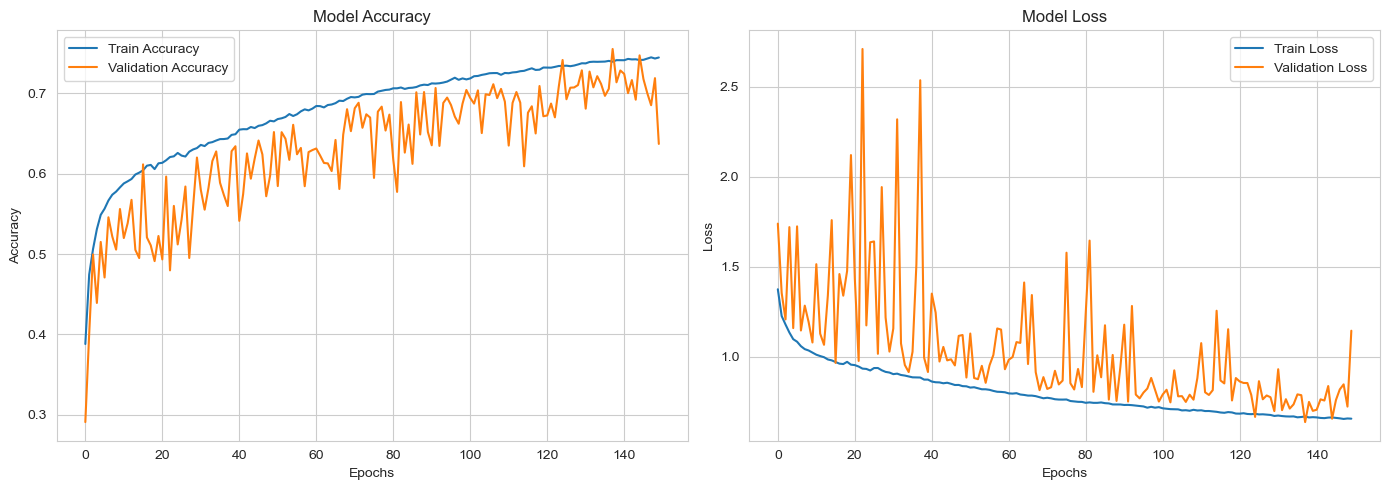

In [159]:
# Model Evaluation, Visualization & Save Model

# Extract training history (last fold)
history_dict = scikeras_classifier.history_
if isinstance(history_dict, list):
    history_dict = history_dict[-1]  # last fold history

# Training vs Validation Accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict["accuracy"], label="Train Accuracy")
plt.plot(history_dict["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Training vs Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history_dict["loss"], label="Train Loss")
plt.plot(history_dict["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


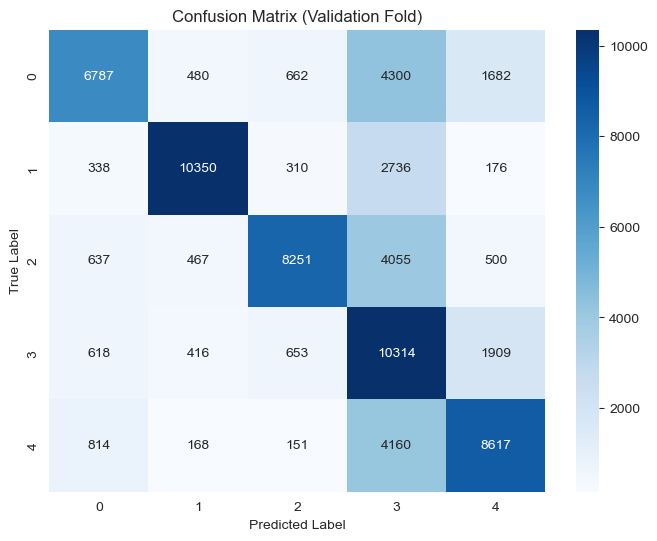

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.49      0.59     13911
           1       0.87      0.74      0.80     13910
           2       0.82      0.59      0.69     13910
           3       0.40      0.74      0.52     13910
           4       0.67      0.62      0.64     13910

    accuracy                           0.64     69551
   macro avg       0.70      0.64      0.65     69551
weighted avg       0.70      0.64      0.65     69551



In [160]:
# Confusion Matrix & Report (last fold)

y_val_pred_proba = scikeras_classifier.predict_proba(X_val_fold)
y_val_pred = np.argmax(y_val_pred_proba, axis=1)
y_val_true = np.argmax(y_val_fold, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_val_true, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_val_true),
            yticklabels=np.unique(y_val_true))
plt.title("Confusion Matrix (Validation Fold)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_val_true, y_val_pred))

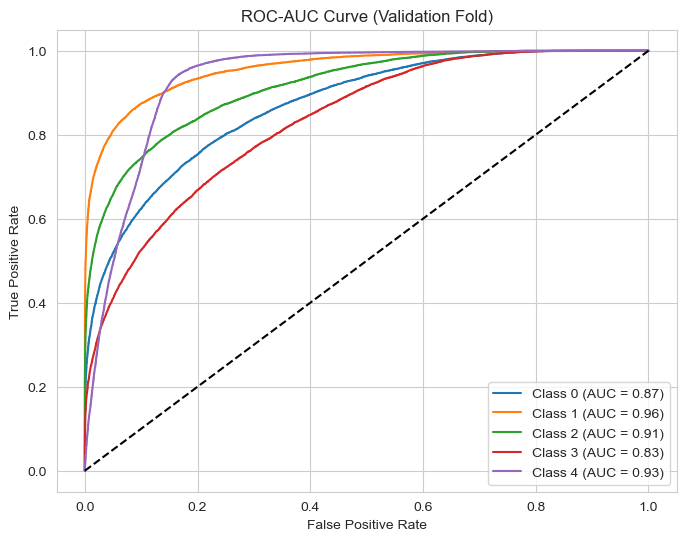

In [161]:
# ROC-AUC Curve (multiclass, last fold)

y_val_true_bin = label_binarize(y_val_true, classes=np.unique(y_val_true))
n_classes = y_val_true_bin.shape[1]

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_val_true_bin[:, i], y_val_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # diagonal baseline
plt.title("ROC-AUC Curve (Validation Fold)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [164]:
# Save Model

# Save the Keras model (last fold best model)
final_model = scikeras_classifier.model_


# Save scikeras wrapper (for sklearn pipeline re-use)
joblib.dump(scikeras_classifier, "scikeras_classifier.pkl")
print("SciKeras wrapper saved as 'scikeras_classifier.pkl'")

SciKeras wrapper saved as 'scikeras_classifier.pkl'


#### Model Evaluation Report

**1. Overall Accuracy**
- The model achieved an ***overall accuracy of ~64%*** on the validation dataset (69,551 samples).
- This indicates that roughly 2 out of 3 CSAT predictions are correct, which is reasonable given the multi-class (5-class) nature of the problem and inherent class overlap.

**2. Training & Convergence Behavior**
- **Training Accuracy:** Gradually increased and stabilized around 74–75%, indicating the model successfully learned meaningful patterns.
- **Validation Accuracy:** Improved steadily and plateaued around 63–65%, showing reasonable generalization.
- **Training vs Validation Gap:** A moderate gap exists, suggesting mild overfitting, but not severe.
- **Loss Curves:**
    - Training loss decreases smoothly, indicating stable optimization.
    - Validation loss is noisier (with spikes), which is expected due to:
        - Class imbalance
        - Multi-class decision boundaries
        - Batch-level variance during validation

Overall, the learning curves indicate stable convergence without divergence or collapse.

**3. Class-wise Performance**

-  **Class 0 (Score 0 - Very Dissatisfied)**
    - Precision: ***0.74***
    - Recall: ***0.49***
    - F1-score: ***0.59***
    The model is conservative when predicting very dissatisfied customers.
    It avoids false positives but misses about half of the actual unhappy customers, which may be risky for customer experience use cases.

- **Class 1 (Score 1 - Dissatisfied)**
    - Precision: ***0.87***
    - Recall: ***0.74***
    - F1-score: ***0.80***
    One of the strongest-performing classes. The model identifies dissatisfied customers reliably and consistently.

- **Class 2 (Score 2 - Neutral)**
    - Precision: ***0.82***
    - Recall: ***0.59***
    - F1-score: ***0.69***

    While predictions are generally accurate, the model misses a sizable portion of neutral cases, often confusing them with neighboring satisfaction levels.

- **Class 3 (Score 3 - Satisfied)**
    - Precision: ***0.40*** - frequent confusion with other classes
    - Recall: ***0.74*** - many samples are predicted as “Satisfied”
    - F1-score: ***0.52***
    The model struggles to clearly distinguish “Satisfied” from adjacent CSAT levels.

- **Class 4 (Score 4 - Very Satisfied)**
    - Precision: ***0.67***
    - Recall: ***0.62***
    - F1-score: ***0.64***

    Reasonable balance between precision and recall. The model performs fairly well at identifying highly satisfied customers without extreme overprediction.


**4. Confusion Matrix Insights**

- Strong diagonal values indicate **good separation for extreme classes.**
- Most misclassifications occur **between adjacent CSAT levels*, e.g.:
    - Neutral ↔ Satisfied
    - Satisfied ↔ Very Satisfied
This behavior is expected in **ordinal targets like CSAT**, where class boundaries are inherently fuzzy.

**5. ROC–AUC Analysis**

- All classes achieve strong **ROC–AUC values (≈0.83–0.96)**.
- This indicates the model has **good ranking ability**, even when hard class predictions are imperfect.
- Especially strong discrimination is observed for:
    - Dissatisfied (Class 1)
    - Very Satisfied (Class 4)
- High AUC combined with lower accuracy suggests:
  The model ranks customers well, but threshold-based class assignment is challenging.

**6. Macro vs Weighted Metrics**
- ***Macro F1-score: ~0.65***
    Reflects moderate but balanced performance across all classes.
- ***Weighted F1-score: ~0.65***
    Indicates performance remains consistent even when accounting for class distribution.

Similar macro and weighted scores imply the model is **not overly dominated by a single class**.

**7. Key Insights**

**Strengths**

- **Strong performance** on **Dissatisfied (1)** and **Very Satisfied (4)** customers.
- Good ranking ability as shown by ROC–AUC.
- Stable training and convergence behavior.
- Reasonable generalization with controlled overfitting.

**Weaknesses**
- **Very Dissatisfied (0) has low recall** → many unhappy customers are missed.
- Satisfied (3) suffers from low precision → class boundary ambiguity.
- Confusion among neighboring CSAT levels limits maximum accuracy.

**8. Conclusion**:

The model demonstrates **robust learning and stable generalization** with an **overall accuracy of ~64%** and **strong ROC–AUC** performance across all classes.
It performs particularly well at identifying dissatisfied and very satisfied customers, which are often the most actionable segments in CSAT analysis.

However, the model struggles with mid-range CSAT levels, especially Satisfied (3), due to overlapping class definitions.

Further improvements may be achieved by:
- Treating CSAT as an ordinal problem
- Using tree-based models (e.g., CatBoost)
- Applying cost-sensitive learning or threshold tuning


In [163]:
scikeras_classifier.model_.save("csat_model.h5")

---
## **Conclusion**

**Data Overview:**
The dataset comprises **85,907 records with 20 variables** from the e-commerce industry, focusing on customer service interactions and CSAT scores. Several categorical variables including *Customer_city*, *Product_category*, and *Item_price* contained missing values, which were systematically handled during preprocessing to ensure model compatibility and stability.

**CSAT Importance:**
CSAT is a critical business KPI that reflects customers’ perception of service quality, responsiveness, and overall experience. Accurate CSAT prediction enables organizations to ***identify dissatisfaction early***, optimize agent performance, and improve service processes in a targeted, data-driven manner.

**Exploratory Data Analysis (EDA):**
EDA revealed important patterns:

* **Response Time Impact:** Longer response times were consistently associated with lower CSAT scores, reinforcing the importance of timely customer support.
* **Product Category Influence:** Certain product categories exhibited persistently lower CSAT, indicating potential product- or process-level issues.
* **Agent Tenure:** More experienced agents tended to achieve higher CSAT scores, highlighting the role of training and tenure.
* **Shift Timings:** Variations in CSAT across shifts suggested workload distribution and staffing balance impact customer satisfaction.
* **Item Price:** Higher-priced items showed a mild tendency toward lower CSAT, suggesting elevated customer expectations at higher price points.

**Statistical Insights:**

* Response times below a critical threshold (≈2 hours) were associated with noticeably better CSAT outcomes.
* Beyond a certain price range, dissatisfaction did not increase proportionally, indicating that pricing alone is not the dominant driver of poor CSAT.

**Data Preparation:**
Preprocessing included handling missing values, encoding categorical variables, and addressing class imbalance using **SMOTE** to strengthen training quality.

**Model Development:**
An **Artificial Neural Network (ANN)** was developed and tuned to predict CSAT scores. Training and testing splits were handled with a **70:30 ratio**.

* **Mean Training Accuracy:** 69.2%
* **Mean Testing Accuracy:** 66.9%
* **Classification Report:**

  * Precision: up to **87%** (class 1)
  * Recall: up to **74%** (class 3)
  * F1-score: overall balance across classes with **macro avg \~0.65**

**Key Findings from Model Performance:**

- The ANN captures **broad CSAT patterns effectively**, particularly at the extremes of satisfaction.
- Most misclassifications occur between **neighboring CSAT levels**, which is expected given the subjective and ordinal nature of satisfaction scores.
- The gap between training and validation performance indicates mild overfitting, but overall generalization remains stable.

**Final Takeaway:**

This project demonstrates that **deep learning models can provide meaningful predictive insights into customer satisfaction**, even in a highly categorical and imbalanced dataset. While the ANN achieves moderate predictive accuracy, its strong ROC–AUC performance suggests it is effective at ranking customer sentiment, even when precise class separation is challenging.

The analysis highlights **response time, product category, agent experience, and operational factors** as key drivers of CSAT.


---